## MAIN NOTEBOOK | COLLAB Version

Main script to run the DAE system simulation and analysis for Mycobacterium smegmatis model calibration and validation.

This script sets up the system parameters, initial conditions, and experimental data for the specified condition,and then runs the simulation and analysis functions.

This is the Collab Version.

- Accesing GitHub
- Installing necessary packages
- Importing libraries

In [ ]:
# 1️⃣ Clone the GitHub repo (or pull latest if re-running)
!git clone https://github.com/camidiazf/Mycobacterium-smegmatis-model-calibration-and-validation.git || echo "repo already exists"
%cd Mycobacterium-smegmatis-model-calibration-and-validation

# 2️⃣ Install dependencies
#    - casadi for your DAE code
#    - pandas/numpy/scipy/matplotlib/openpyxl for data & plotting
%pip install --quiet casadi pandas numpy scipy matplotlib openpyxl mealpy

# 3️⃣ Make sure Python can see your modules
import sys, os
sys.path.append(os.getcwd())

# 4️⃣ Now you can import and run exactly as in Main.ipynb
from DAE_System_Run import RUN_MAIN #type: ignore

# (Optional) print versions to verify
import casadi, pandas as pd, numpy as np #type: ignore
print("CasADi", casadi.__version__,
        "pandas", pd.__version__,
        "numpy", np.__version__)


Cloning into 'Mycobacterium-smegmatis-model-calibration-and-validation'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 6), reused 22 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 8.15 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/Mycobacterium-smegmatis-model-calibration-and-validation/Mycobacterium-smegmatis-model-calibration-and-validation/Mycobacterium-smegmatis-model-calibration-and-validation/Mycobacterium-smegmatis-model-calibration-and-validation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.9/397.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 61.7 MB/s eta 0:00:00
CasADi 3.7.0 pandas 2.2.2 numpy 2.0.2


# Parameter Calibration

In [5]:
condition = 'Normal'
perturbation = 0.10
correlation_threshold = 0.95

In [6]:
excel_file = 'results_iter_over_same_values_1.xlsx' # Specify the path to the Excel file
if os.path.exists(excel_file):
    os.remove(excel_file)
    print(f">>> Existing file {excel_file!r} removed – starting fresh")

df = pd.DataFrame()
print(">>> Starting with empty DataFrame")

df.to_excel(excel_file, index=False)
print(f">>> Written new file {excel_file!r}")

>>> Existing file 'results_iter_over_same_values_1.xlsx' removed – starting fresh
>>> Starting with empty DataFrame
>>> Written new file 'results_iter_over_same_values_1.xlsx'


In [7]:
params_list = ['pH_UL', 'mu_max']  # List of parameters to calibrate
lb =          [6,        0.4]      # Lower bounds
ub =          [6.5,        0.5]    # Upper bounds
n = 10                             # Number of iterations




                                    ......Running iteration 1 of 10......
 
 
                                ------------------------------
                                ------- ORIGINAL MODEL -------
                                ------------------------------
 
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 1.4169004281543494
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson statistic: 0.9175698253014171


CasADi - 2025-07-08 03:22:10 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated.
The same functionality is provided by providing additional input arguments to the 'integrator' function, in particular:
 * Call integrator(..., t0, tf, options) for a single output time, or
 * Call integrator(..., t0, grid, options) for multiple grid points.
The legacy 'output_t0' option can be emulated by including or excluding 't0' in 'grid'.
Backwards compatibility is provided in this release only.") [.../casadi/core/integrator.cpp:692]


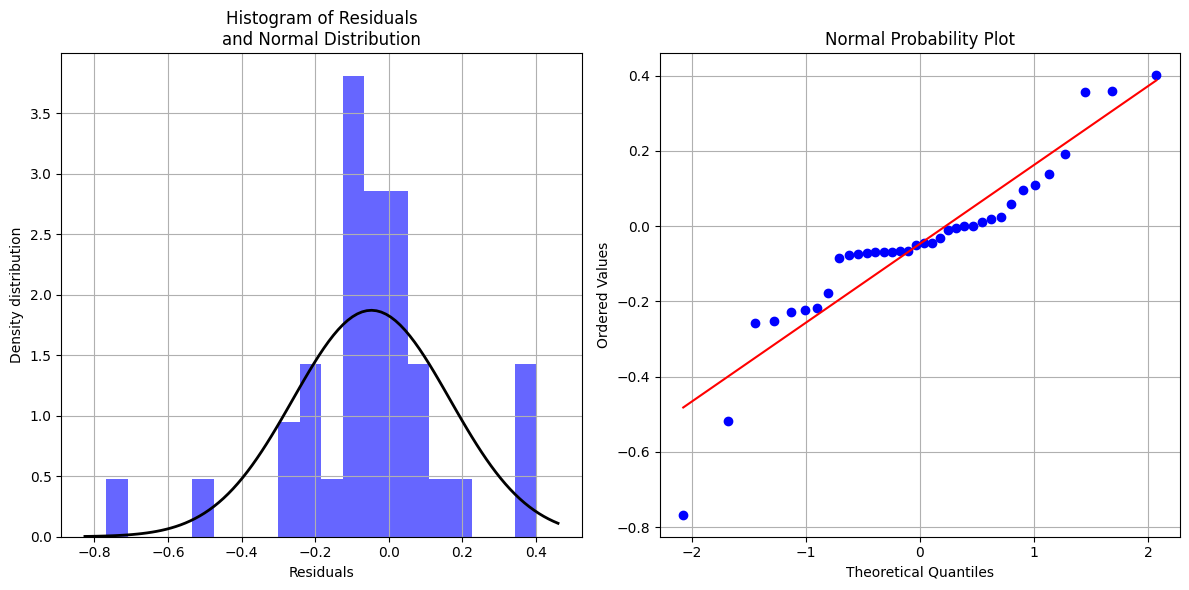

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


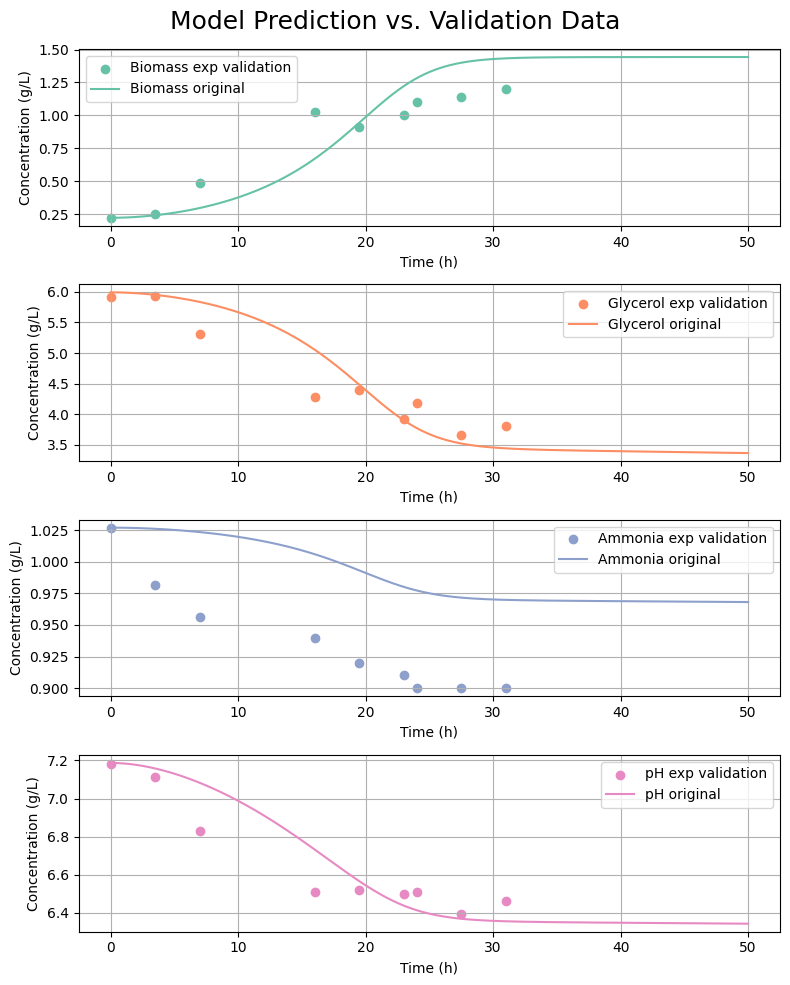

                                -------------- Sensitivity Analysis --------------


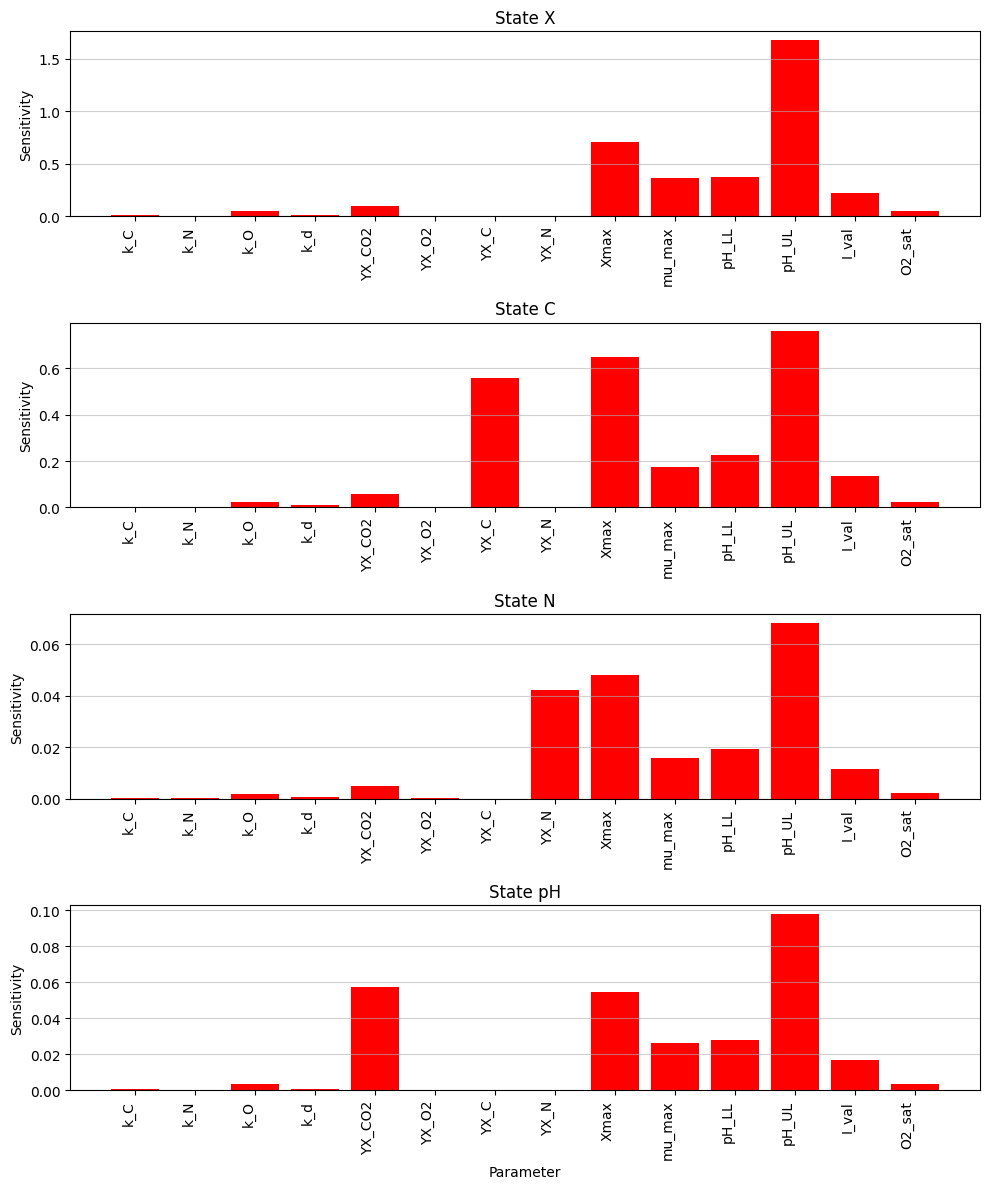

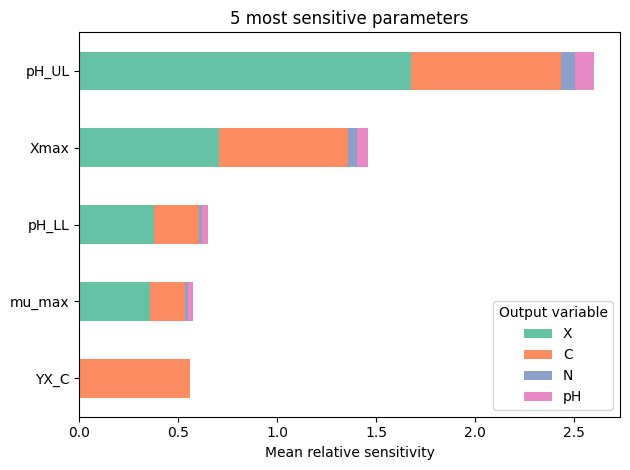

 
 
                                -------------- FIM Analysis --------------


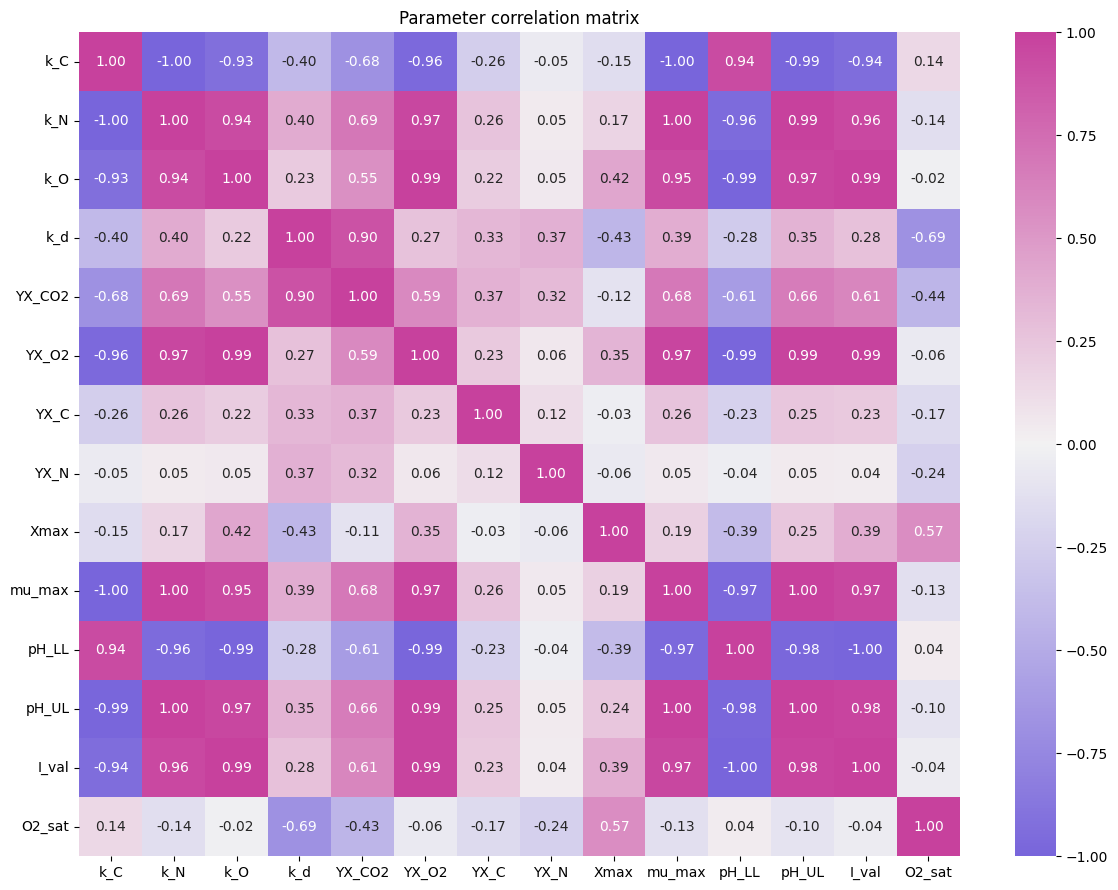

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> k_N                  | correlation: -0.9968
k_C                  <--> YX_O2                | correlation: -0.9616
k_C                  <--> mu_max               | correlation: -0.9954
k_C                  <--> pH_UL                | correlation: -0.9888
k_N                  <--> YX_O2                | correlation: 0.9678
k_N                  <--> mu_max               | correlation: 0.9996
k_N                  <--> pH_LL                | correlation: -0.9584
k_N                  <--> pH_UL                | correlation: 0.9948
k_N                  <--> I_val                | correlation: 0.9587
k_O                  <--> YX_O2                | correlation: 0.9930
k_O                  <--> pH_LL                | correlation: -0.9934
k_O                  <--> pH_UL                | correlation: 0.9690
k_O                  <--> I_val                | correlation: 0.9933
YX_O2                <--> mu_max               |

INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.465616067769496, Global best: 10.465616067769496, Runtime: 0.60759 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.465616067769496, Global best: 10.465616067769496, Runtime: 0.52368 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.465616067769496, Global best: 10.465616067769496, Runtime: 0.54871 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.465616067769496, Global best: 10.465616067769496, Runtime: 0.52240 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.462434213115346, Global best: 10.462434213115346, Runtime: 0.55614 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.325927890252506, Global best: 10.325927890252506, Runtime: 0.57796 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epo

Mejores parámetros encontrados: [6.49999966 0.40021344]
Error mínimo: 10.308526335316666
Tiempo de optimización: 9.37 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.500000
1    mu_max      0.15  0.400213
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8276119958954595
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson sta

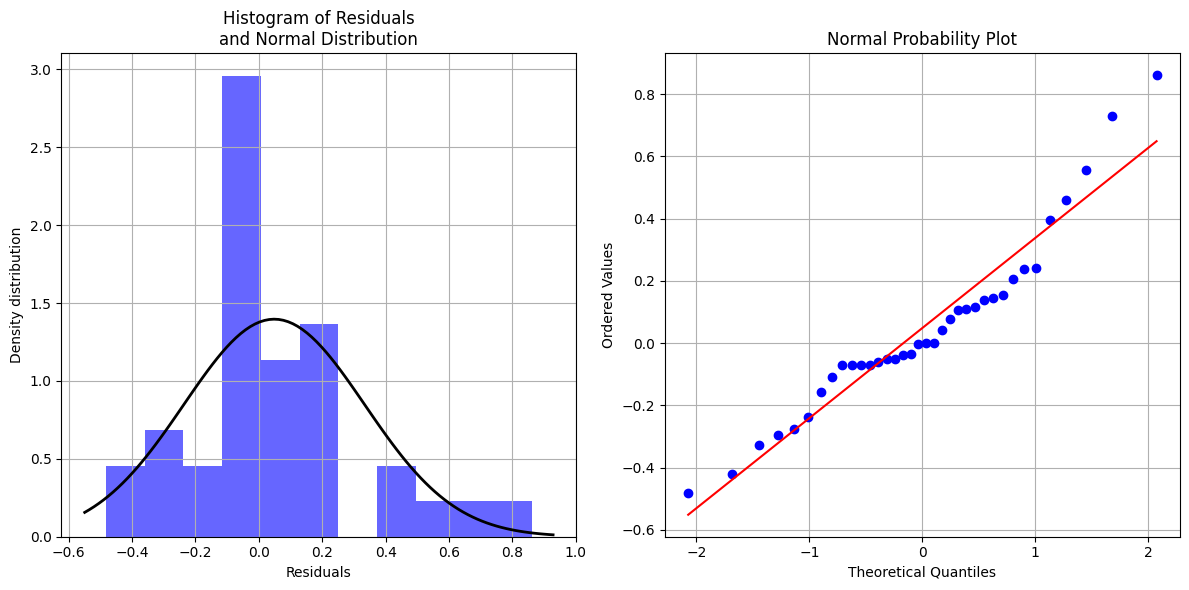

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


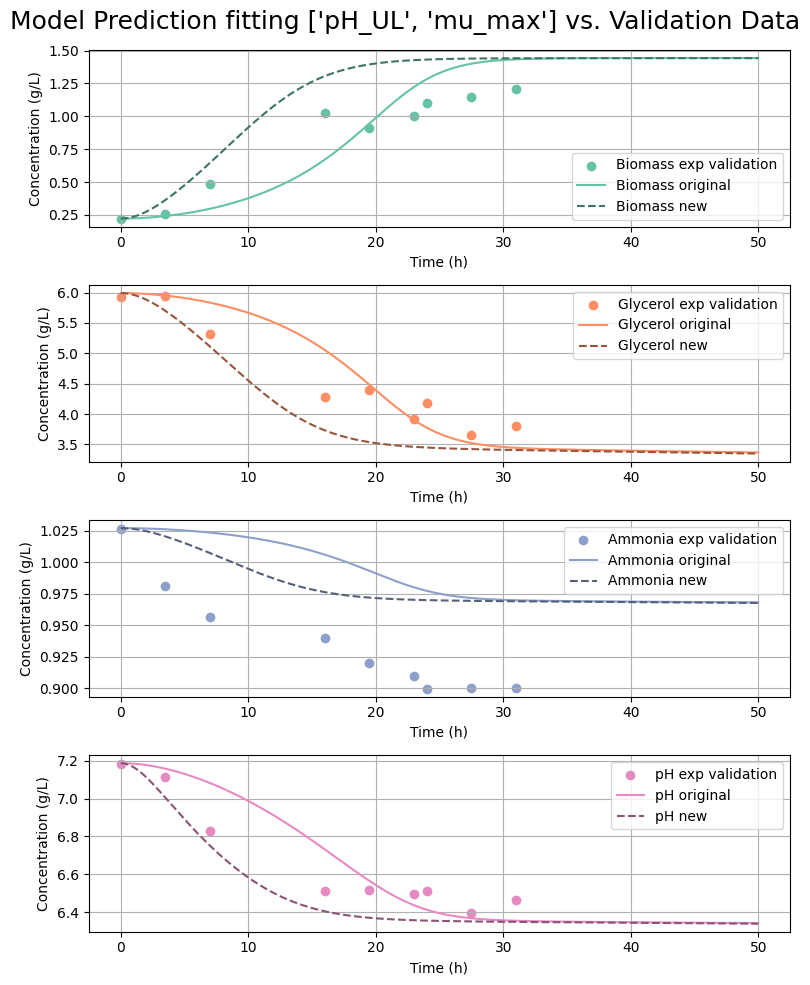

                                -------------- Sensitivity Analysis --------------


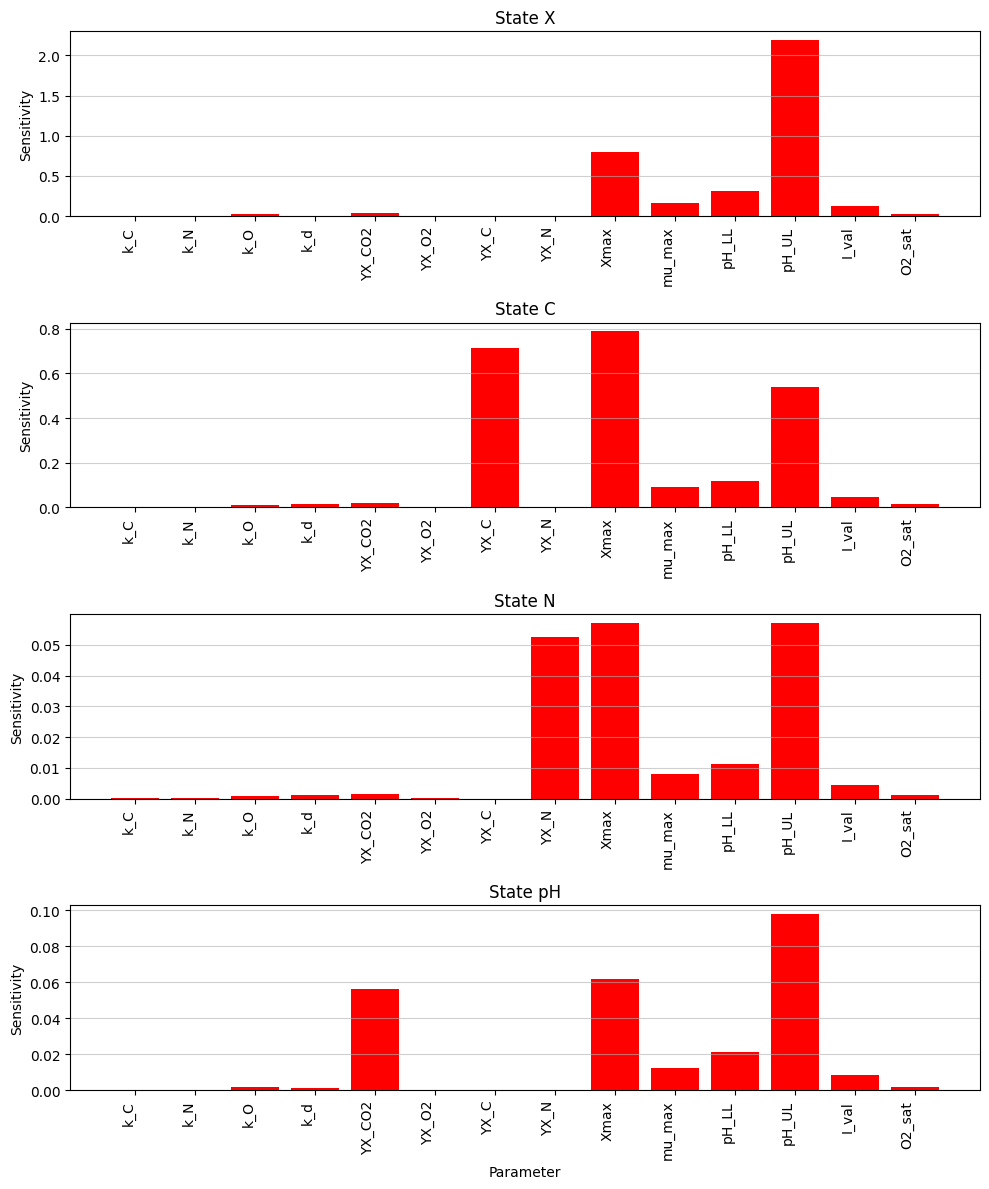

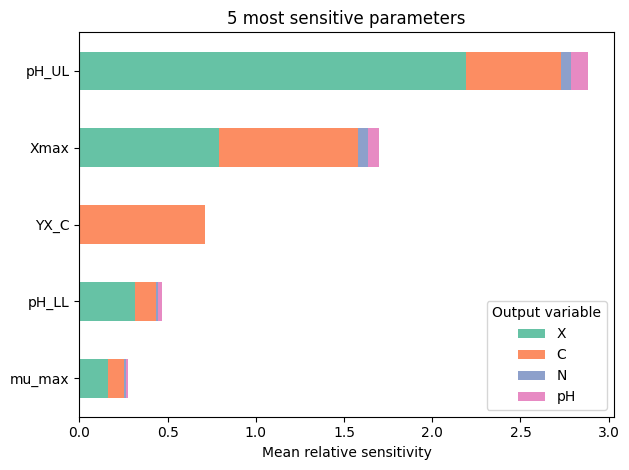

 
 
                                -------------- FIM Analysis --------------


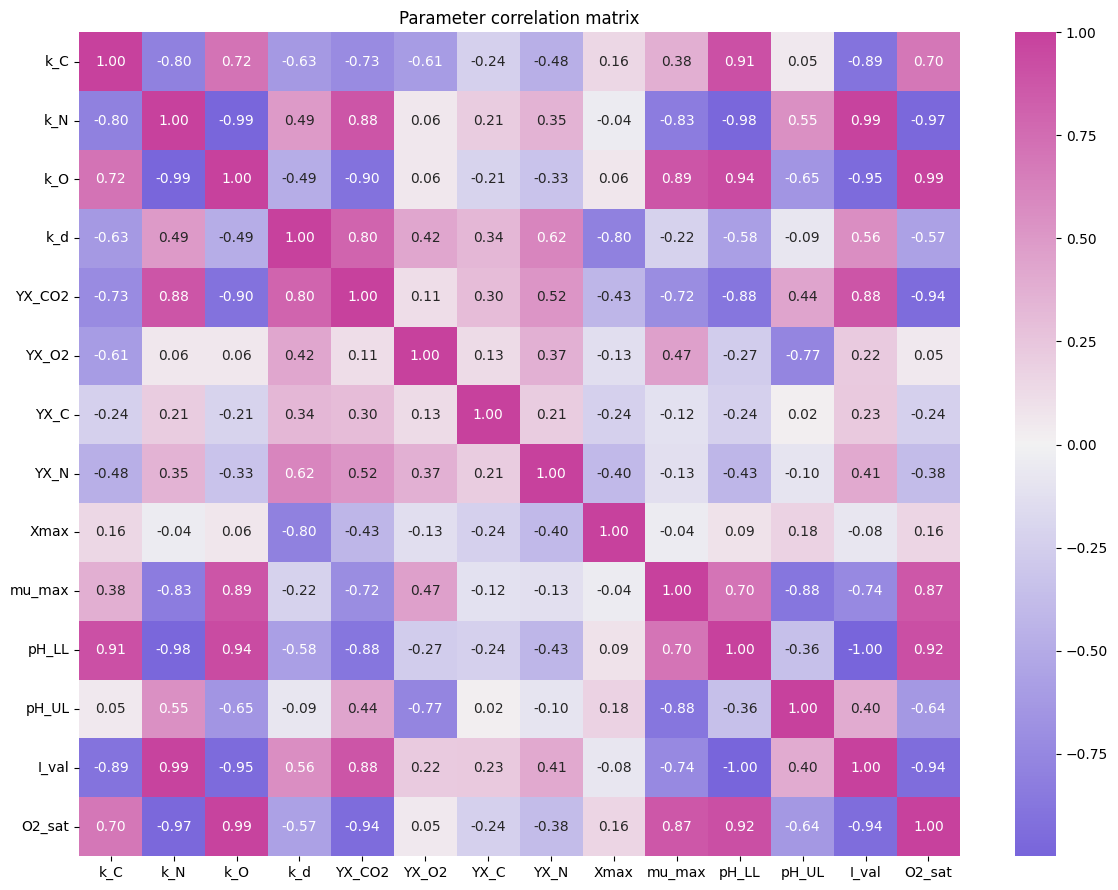

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_N                  <--> k_O                  | correlation: -0.9892
k_N                  <--> pH_LL                | correlation: -0.9753
k_N                  <--> I_val                | correlation: 0.9856
k_N                  <--> O2_sat               | correlation: -0.9699
k_O                  <--> I_val                | correlation: -0.9542
k_O                  <--> O2_sat               | correlation: 0.9908
pH_LL                <--> I_val                | correlation: -0.9986
 
 
                                -------------- t-values --------------
 
 
pH_UL     : θ = 6.500000, SE = 0.000290, t-value = 22440.09
mu_max    : θ = 0.400213, SE = 0.000307, t-value = 1302.17
Appended row, df rows went 1 → 2
Saved to results_iter_over_same_values_1.xlsx



                                    ......Running iteration 3 of 10......
 
 
                                --------------------------------
                                ------- 

INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.886556288632054, Global best: 10.886556288632054, Runtime: 0.61890 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.61927218269788, Global best: 10.61927218269788, Runtime: 0.56435 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.422051944202746, Global best: 10.422051944202746, Runtime: 0.59610 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.422051944202746, Global best: 10.422051944202746, Runtime: 0.55082 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.393192995175477, Global best: 10.393192995175477, Runtime: 0.58896 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.393192995175477, Global best: 10.393192995175477, Runtime: 0.54671 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch

Mejores parámetros encontrados: [6.49960442 0.40003629]
Error mínimo: 10.308812021643213
Tiempo de optimización: 10.21 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499604
1    mu_max      0.15  0.400036
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.826383515728331
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson sta

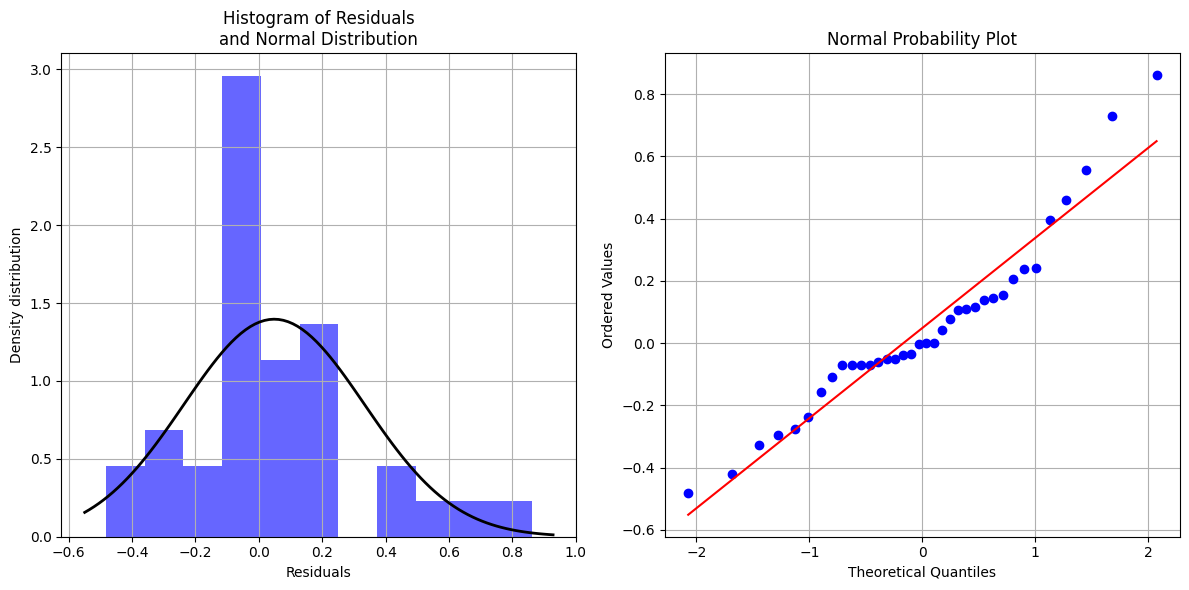

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


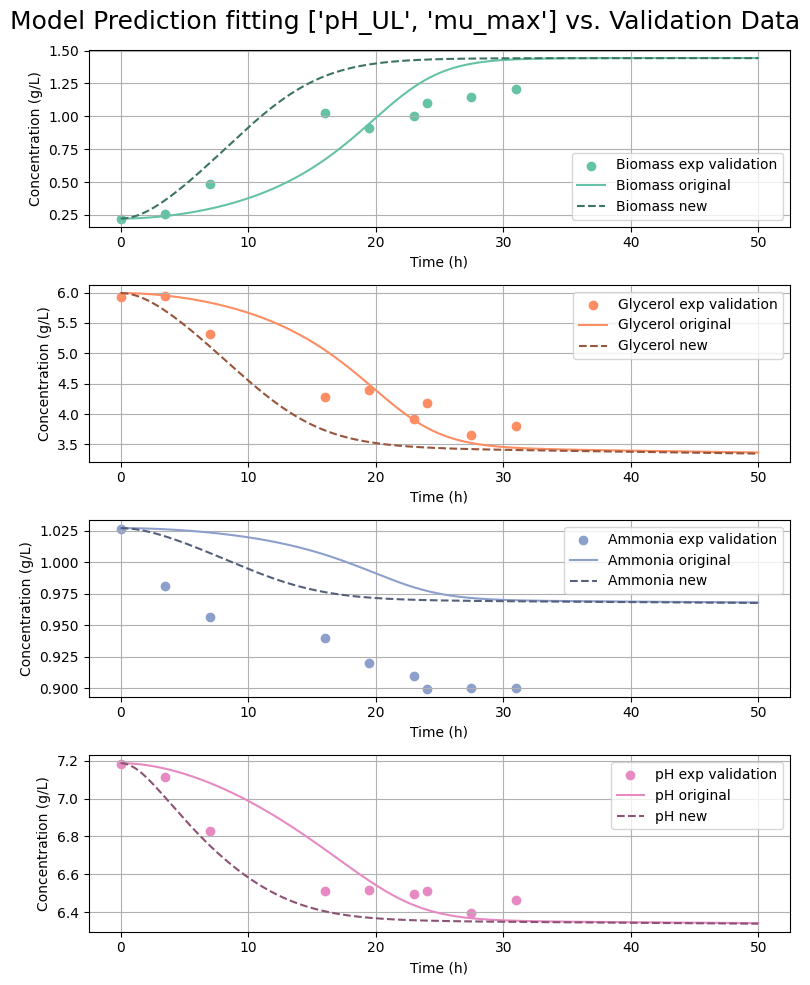

                                -------------- Sensitivity Analysis --------------


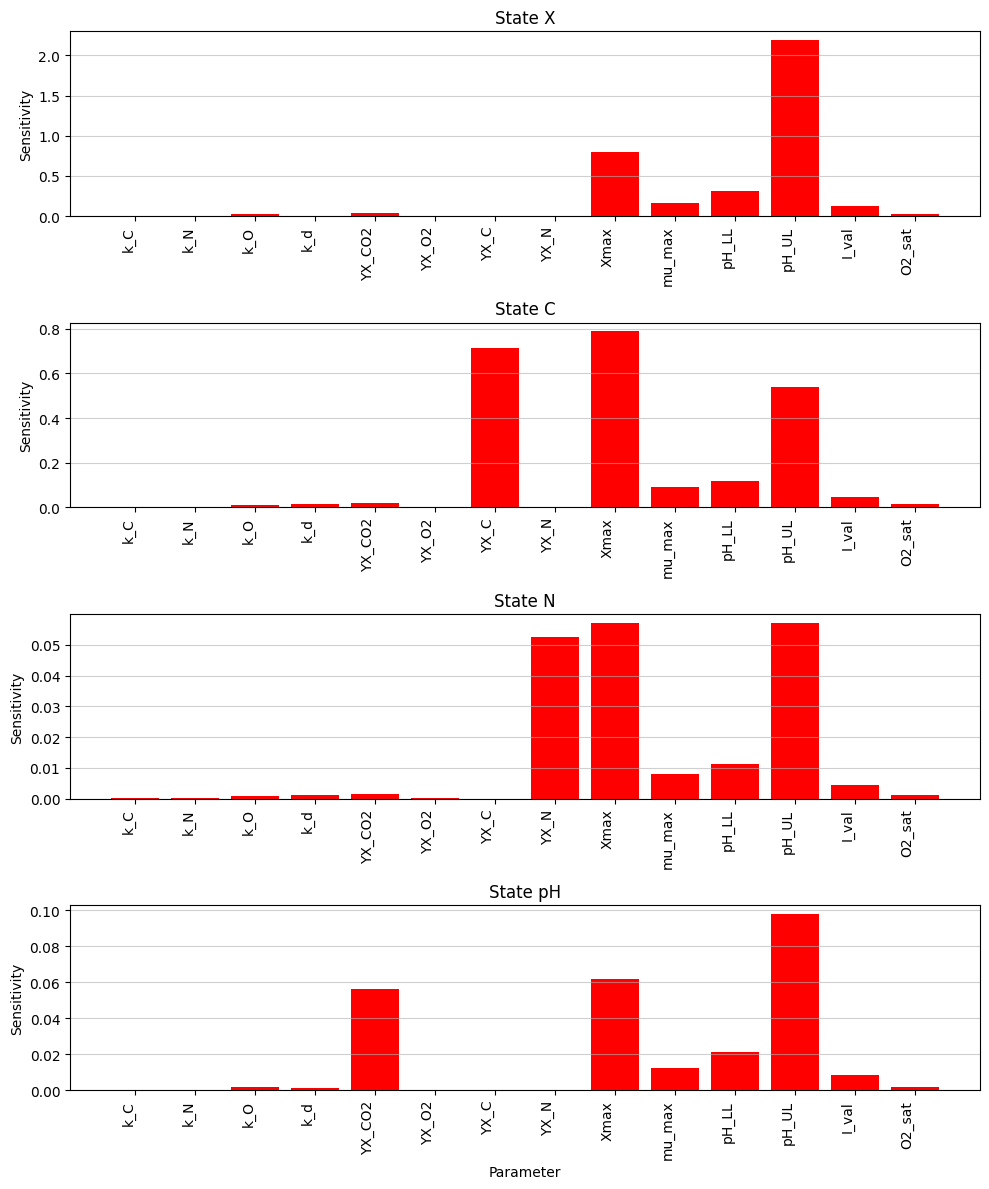

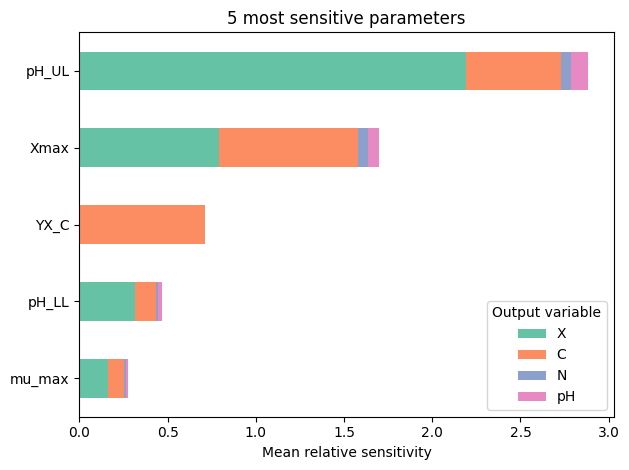

 
 
                                -------------- FIM Analysis --------------


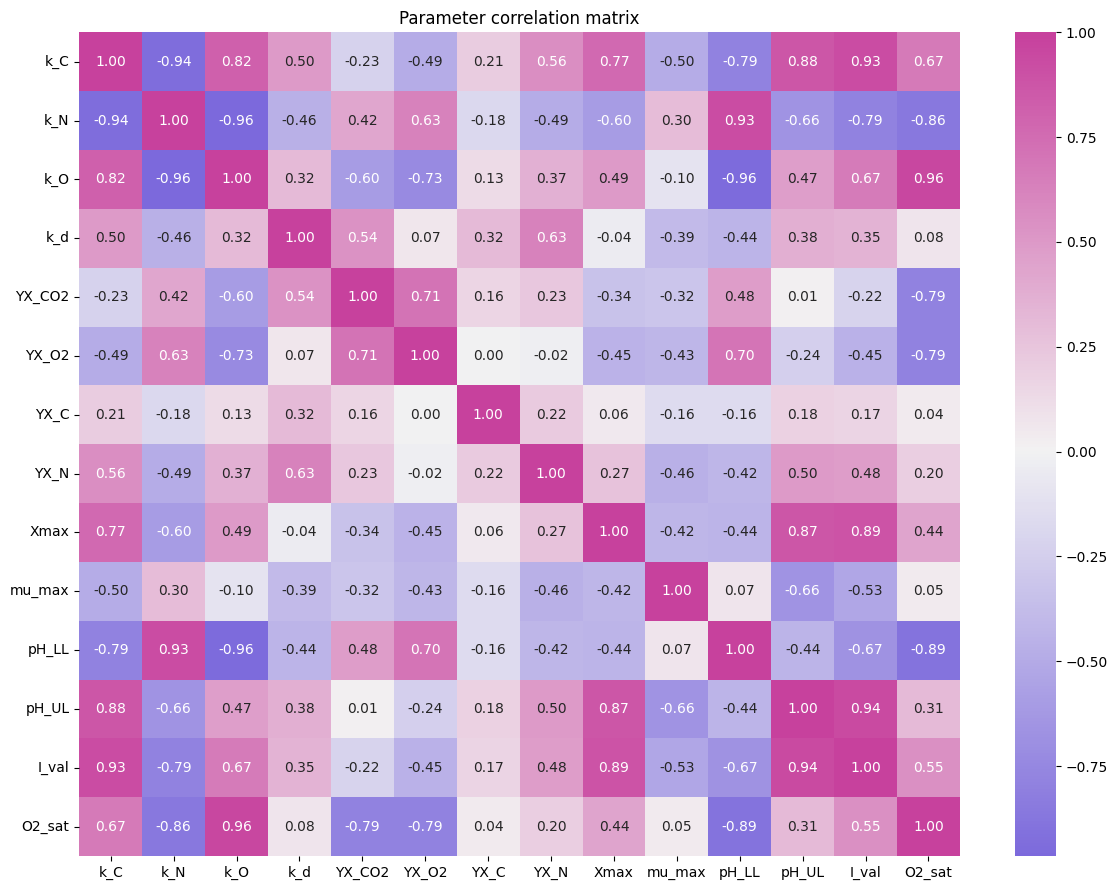

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_N                  <--> k_O                  | correlation: -0.9650
k_O                  <--> pH_LL                | correlation: -0.9562
k_O                  <--> O2_sat               | correlation: 0.9589
 
 
                                -------------- t-values --------------
 
 
pH_UL     : θ = 6.499604, SE = 0.000299, t-value = 21757.62
mu_max    : θ = 0.400036, SE = 0.000317, t-value = 1261.21
Appended row, df rows went 2 → 3
Saved to results_iter_over_same_values_1.xlsx



                                    ......Running iteration 4 of 10......
 
 
                                --------------------------------
                                ------- PSO optimization -------
                                --------------------------------
 


INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.629220701619312, Global best: 10.629220701619312, Runtime: 0.89470 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.397999932597731, Global best: 10.397999932597731, Runtime: 0.57813 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.397999932597731, Global best: 10.397999932597731, Runtime: 0.61459 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.397999932597731, Global best: 10.397999932597731, Runtime: 0.63980 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.386223177285578, Global best: 10.386223177285578, Runtime: 0.57312 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.37647450749619, Global best: 10.37647450749619, Runtime: 0.59699 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch

Mejores parámetros encontrados: [6.49987141 0.40009142]
Error mínimo: 10.3072926037169
Tiempo de optimización: 11.10 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499871
1    mu_max      0.15  0.400091
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8272981243925344
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson stat

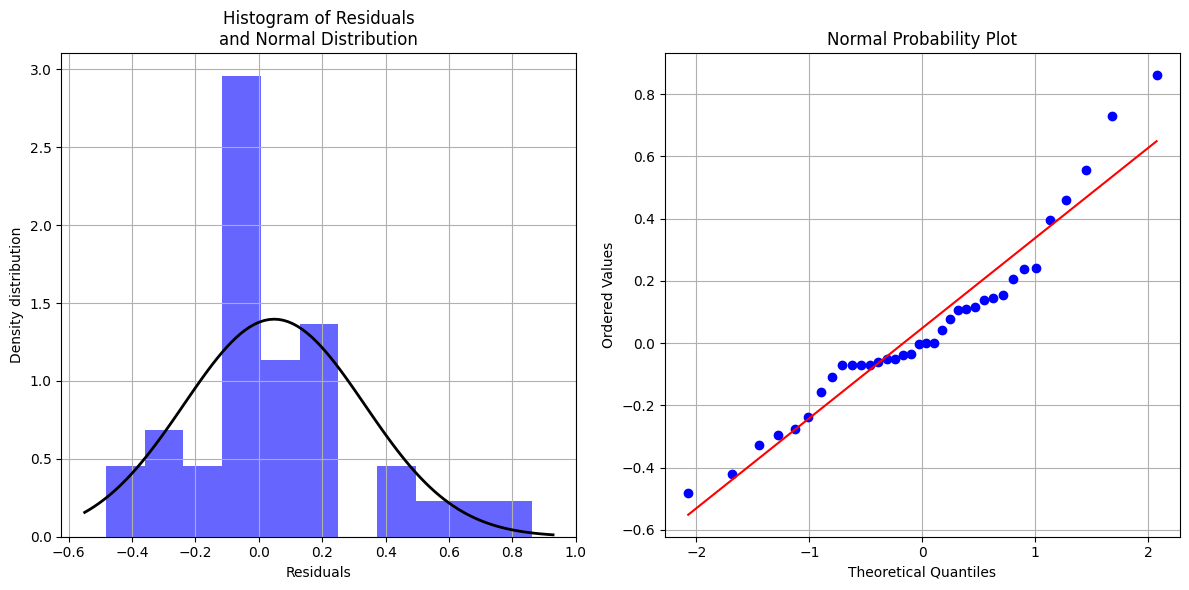

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


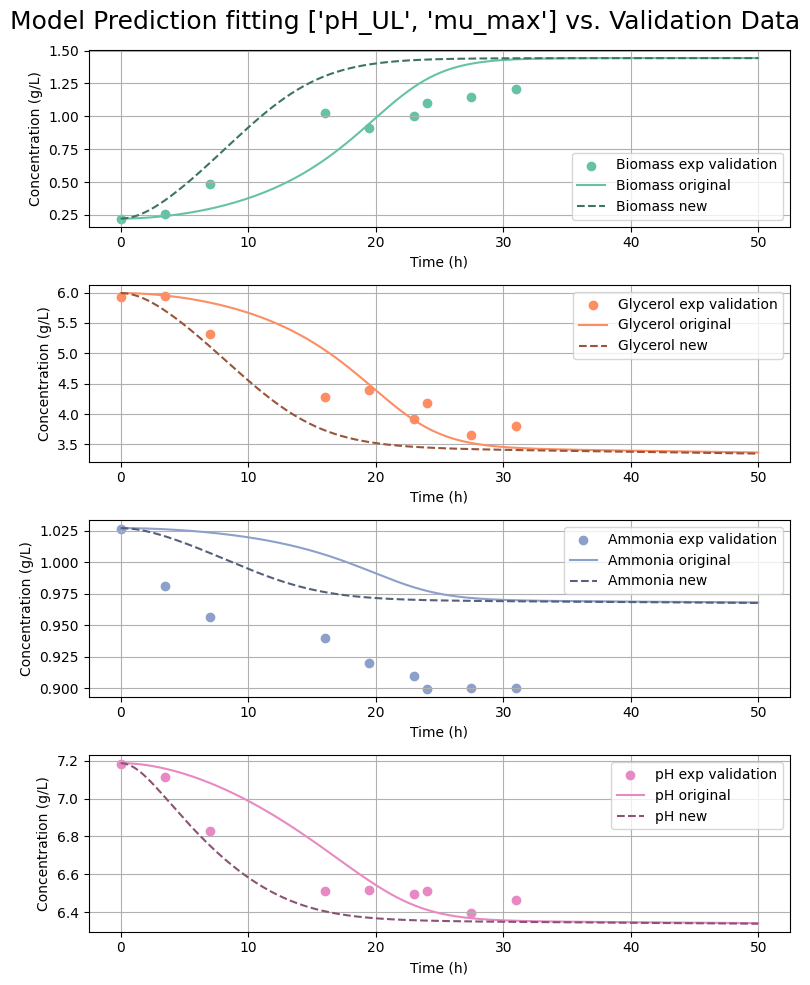

                                -------------- Sensitivity Analysis --------------


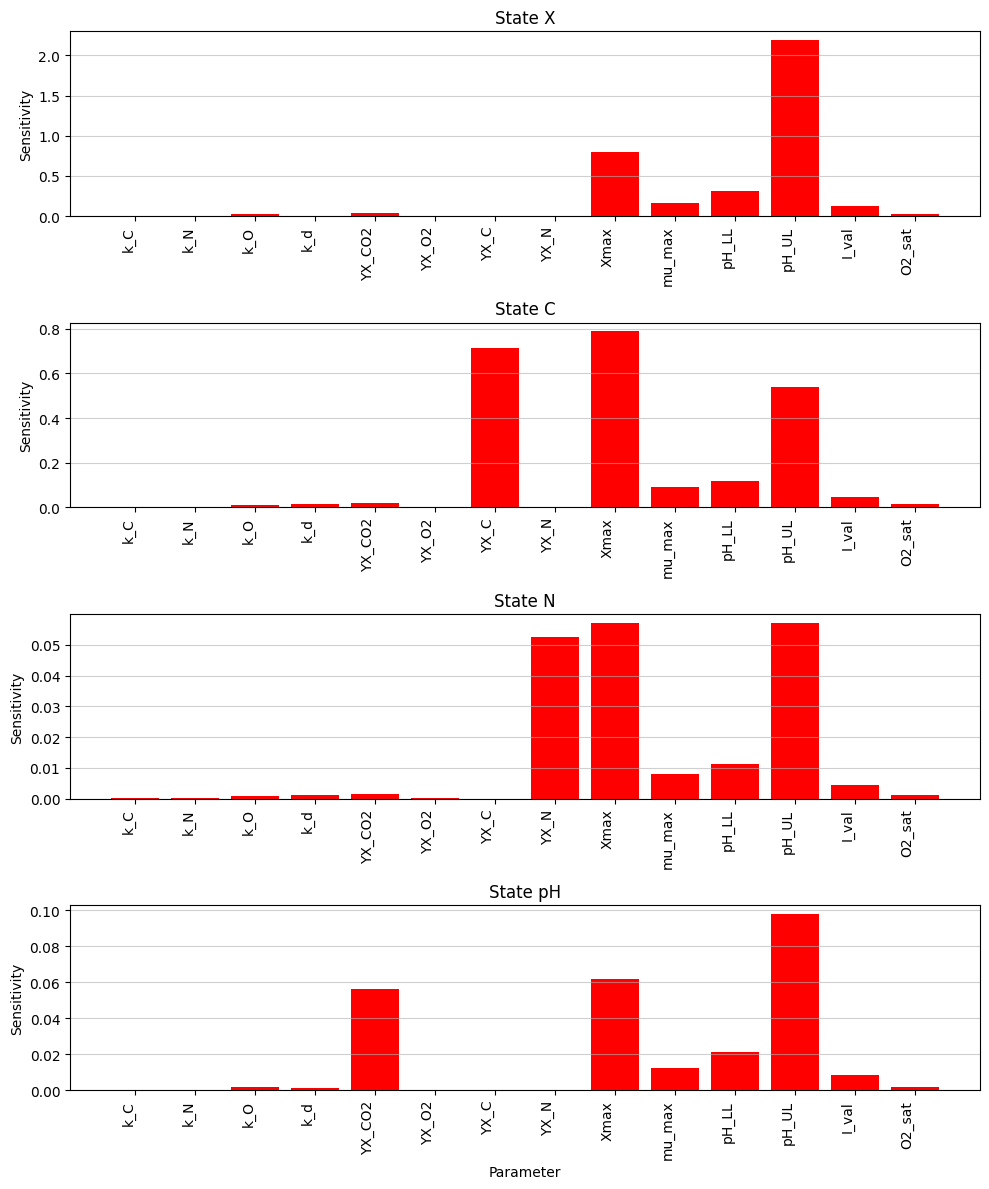

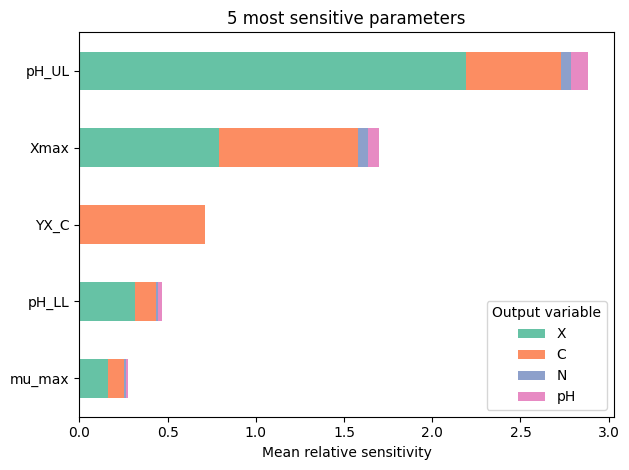

 
 
                                -------------- FIM Analysis --------------


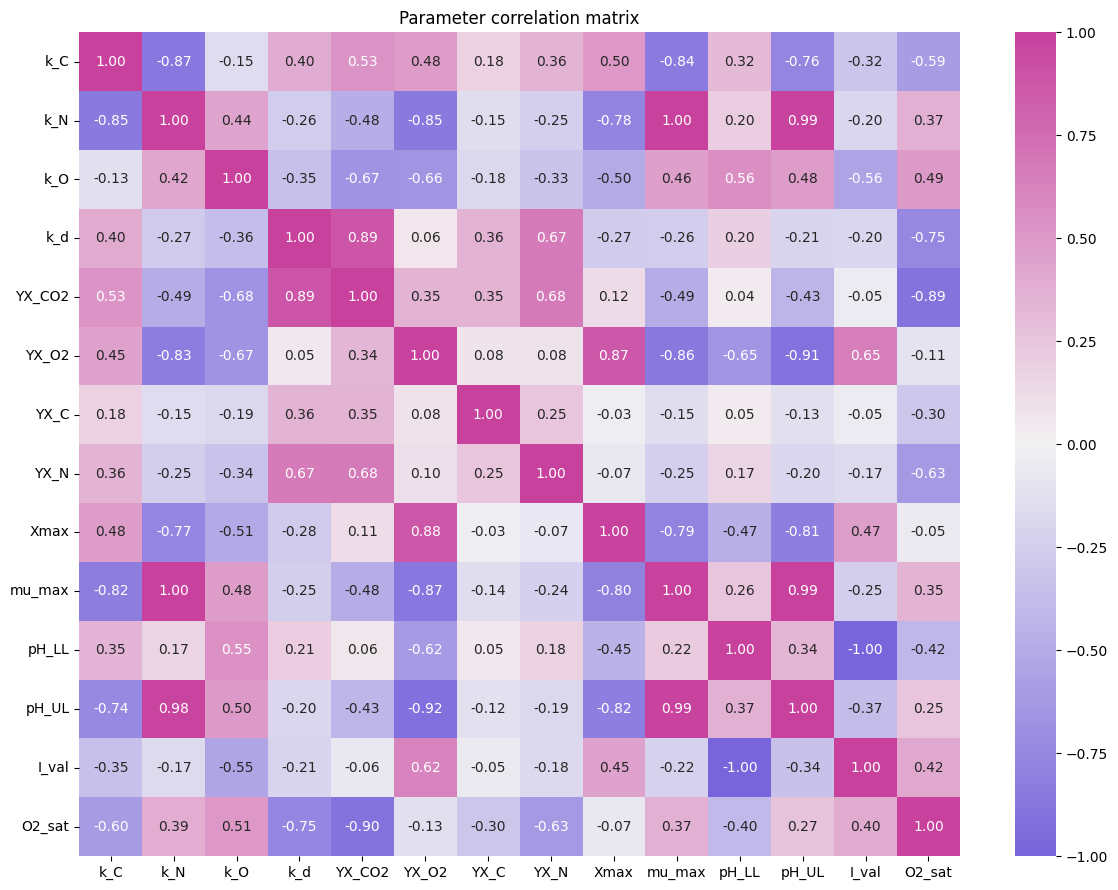

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_N                  <--> mu_max               | correlation: 0.9992
k_N                  <--> pH_UL                | correlation: 0.9862
mu_max               <--> pH_UL                | correlation: 0.9931
pH_LL                <--> I_val                | correlation: -1.0000
 
 
                                -------------- t-values --------------
 
 
pH_UL     : θ = 6.499871, SE = 0.000302, t-value = 21531.80
mu_max    : θ = 0.400091, SE = 0.000320, t-value = 1248.93
Appended row, df rows went 3 → 4
Saved to results_iter_over_same_values_1.xlsx



                                    ......Running iteration 5 of 10......
 
 
                                --------------------------------
                                ------- PSO optimization -------
                                --------------------------------
 


INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.521571520125532, Global best: 10.521571520125532, Runtime: 0.97004 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.521571520125532, Global best: 10.521571520125532, Runtime: 0.54744 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.521571520125532, Global best: 10.521571520125532, Runtime: 0.66868 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.4198011324584, Global best: 10.4198011324584, Runtime: 0.91513 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.417252344486402, Global best: 10.417252344486402, Runtime: 0.95943 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.357504280257677, Global best: 10.357504280257677, Runtime: 0.92429 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 

Mejores parámetros encontrados: [6.49998433 0.40000607]
Error mínimo: 10.304480696803415
Tiempo de optimización: 11.86 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499984
1    mu_max      0.15  0.400006
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8278302999332041
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson st

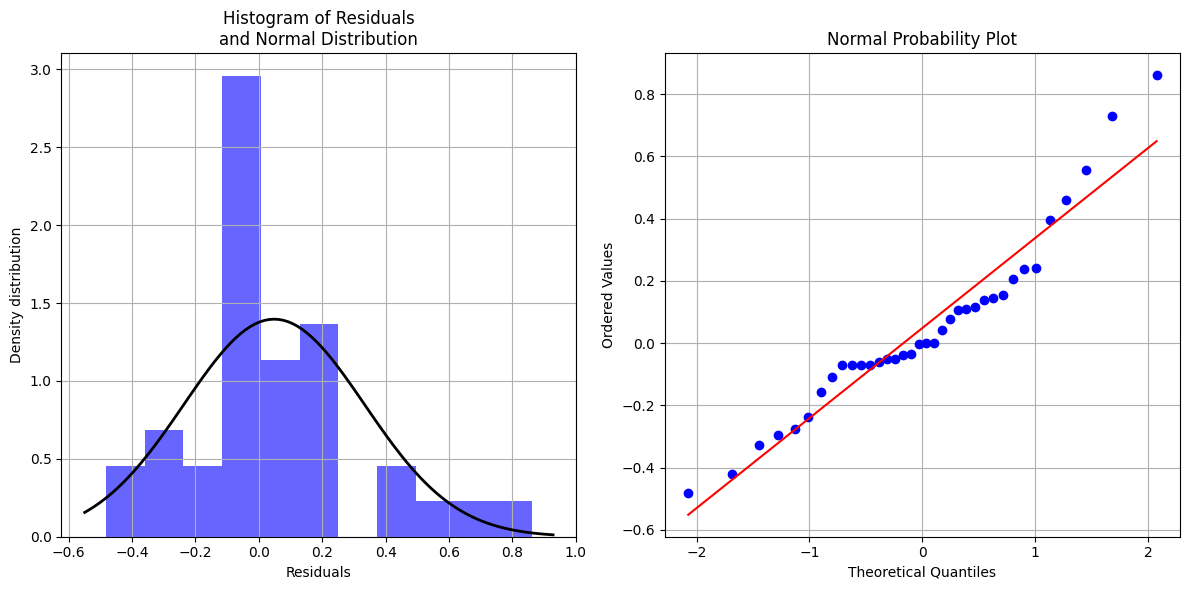

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


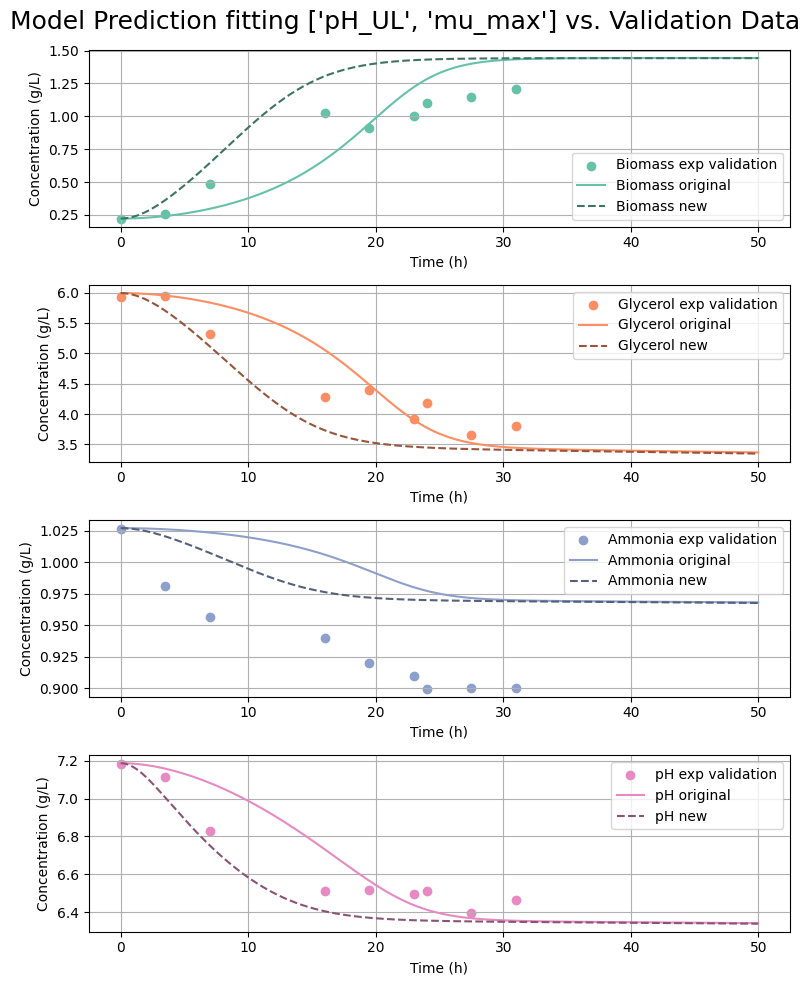

                                -------------- Sensitivity Analysis --------------


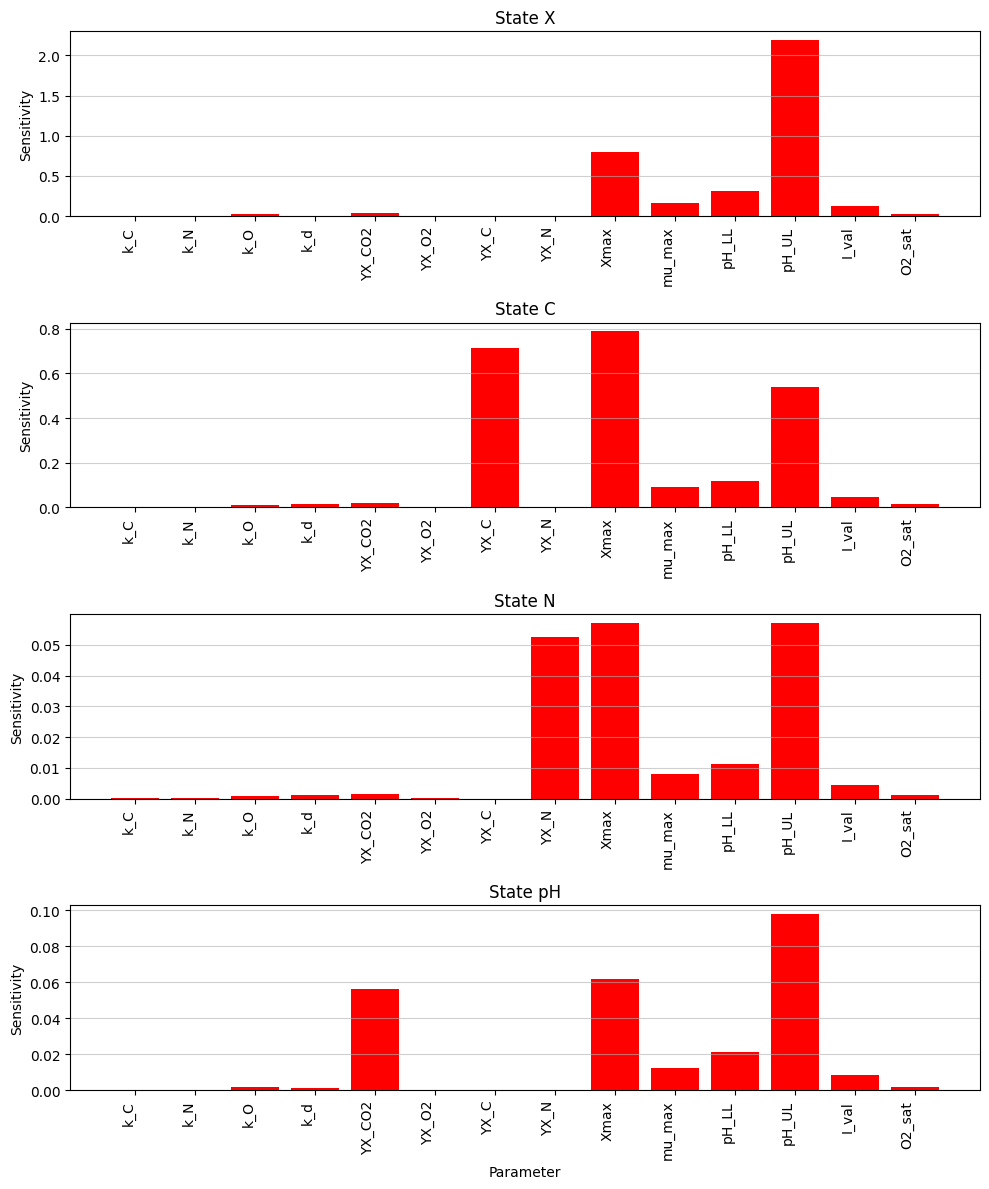

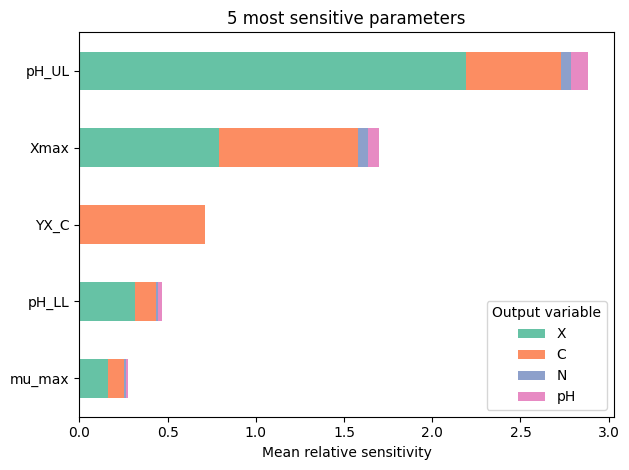

 
 
                                -------------- FIM Analysis --------------


/content/Mycobacterium-smegmatis-model-calibration-and-validation/Mycobacterium-smegmatis-model-calibration-and-validation/Mycobacterium-smegmatis-model-calibration-and-validation/Mycobacterium-smegmatis-model-calibration-and-validation/Aux_Functions.py:89: RuntimeWarning: invalid value encountered in sqrt
  corr_matrix[i, j] = FIM_inv[i, j] / np.sqrt(FIM_inv[i, i] * FIM_inv[j, j])


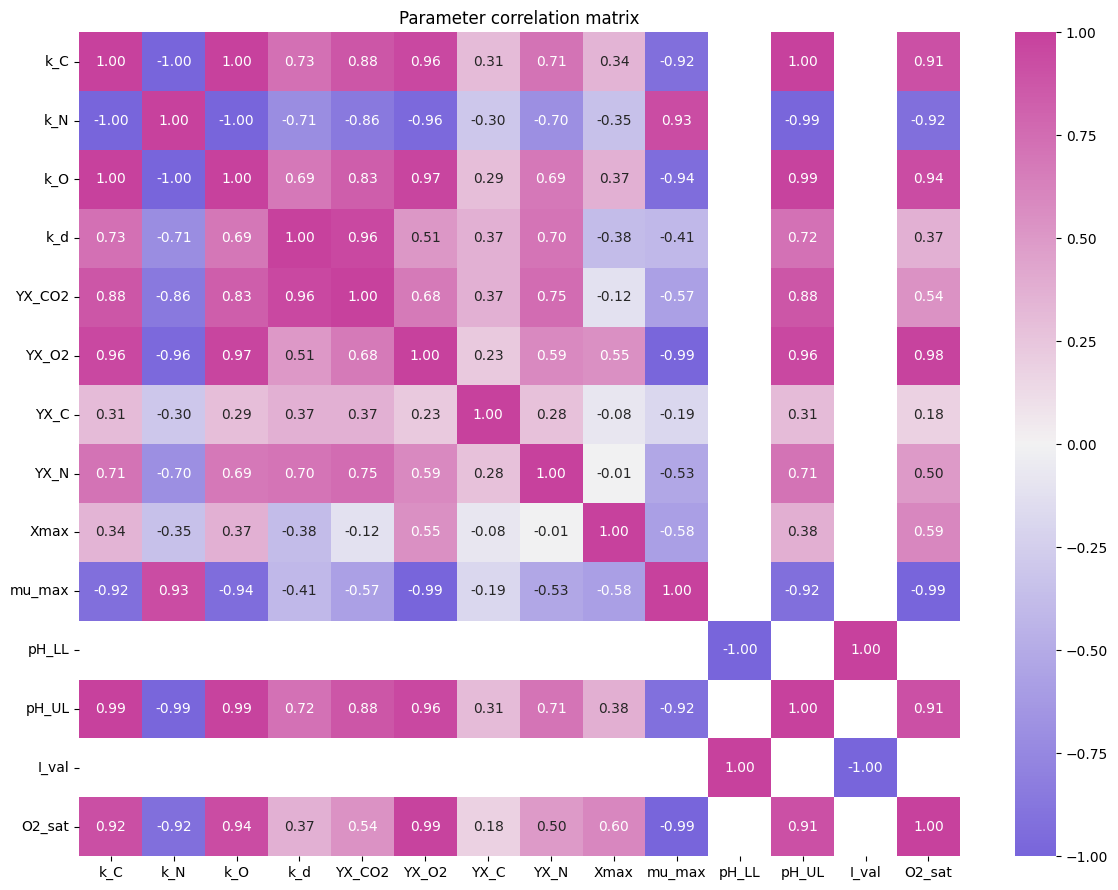

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> k_N                  | correlation: -0.9991
k_C                  <--> k_O                  | correlation: 0.9973
k_C                  <--> YX_O2                | correlation: 0.9587
k_C                  <--> pH_UL                | correlation: 0.9953
k_N                  <--> k_O                  | correlation: -0.9993
k_N                  <--> YX_O2                | correlation: -0.9632
k_N                  <--> pH_UL                | correlation: -0.9919
k_O                  <--> YX_O2                | correlation: 0.9696
k_O                  <--> pH_UL                | correlation: 0.9892
k_d                  <--> YX_CO2               | correlation: 0.9578
YX_O2                <--> mu_max               | correlation: -0.9917
YX_O2                <--> pH_UL                | correlation: 0.9607
YX_O2                <--> O2_sat               | correlation: 0.9848
mu_max               <--> O2_sat               | 

INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.486823659360342, Global best: 10.486823659360342, Runtime: 0.58373 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.486823659360342, Global best: 10.486823659360342, Runtime: 0.72392 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.486823659360342, Global best: 10.486823659360342, Runtime: 0.73177 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.437676122774082, Global best: 10.437676122774082, Runtime: 0.75219 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.334682731349481, Global best: 10.334682731349481, Runtime: 0.55936 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.333475400189856, Global best: 10.333475400189856, Runtime: 0.58122 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epo

Mejores parámetros encontrados: [6.49988918 0.40000146]
Error mínimo: 10.305266128912193
Tiempo de optimización: 10.91 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499889
1    mu_max      0.15  0.400001
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8274831145853838
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson st

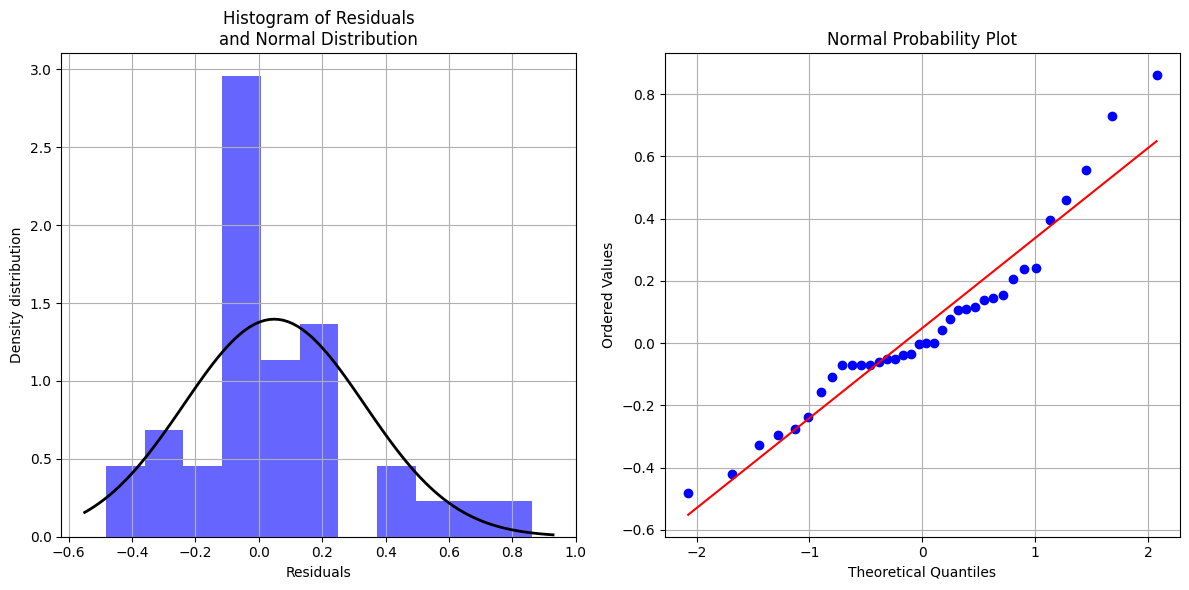

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


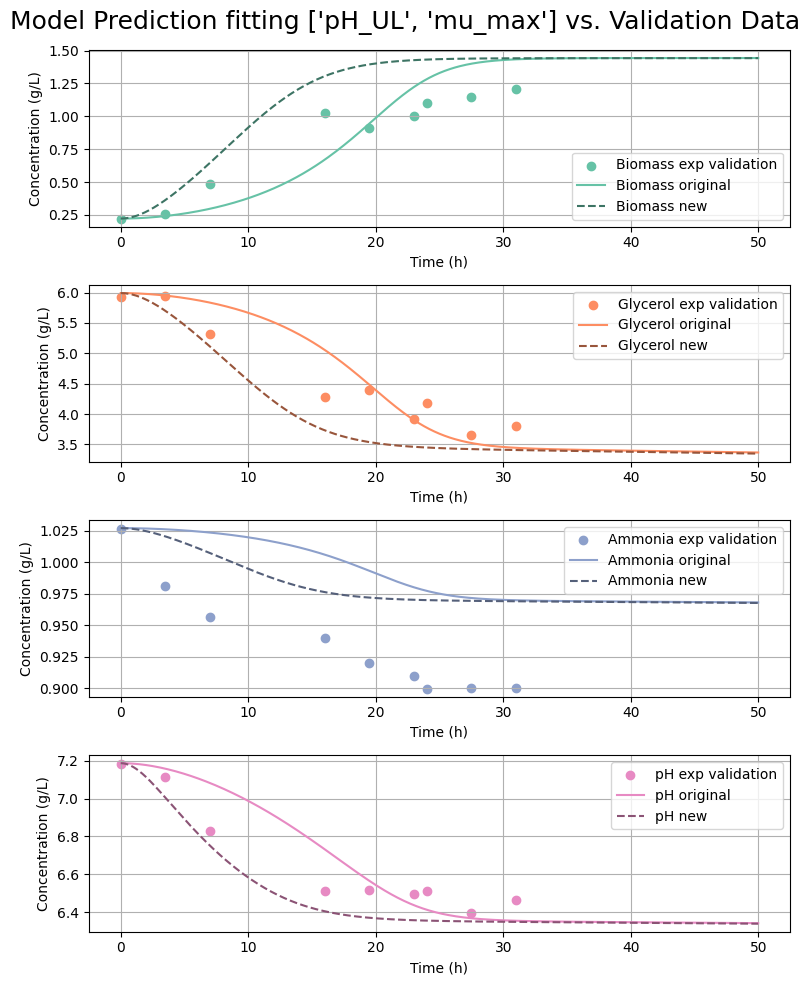

                                -------------- Sensitivity Analysis --------------


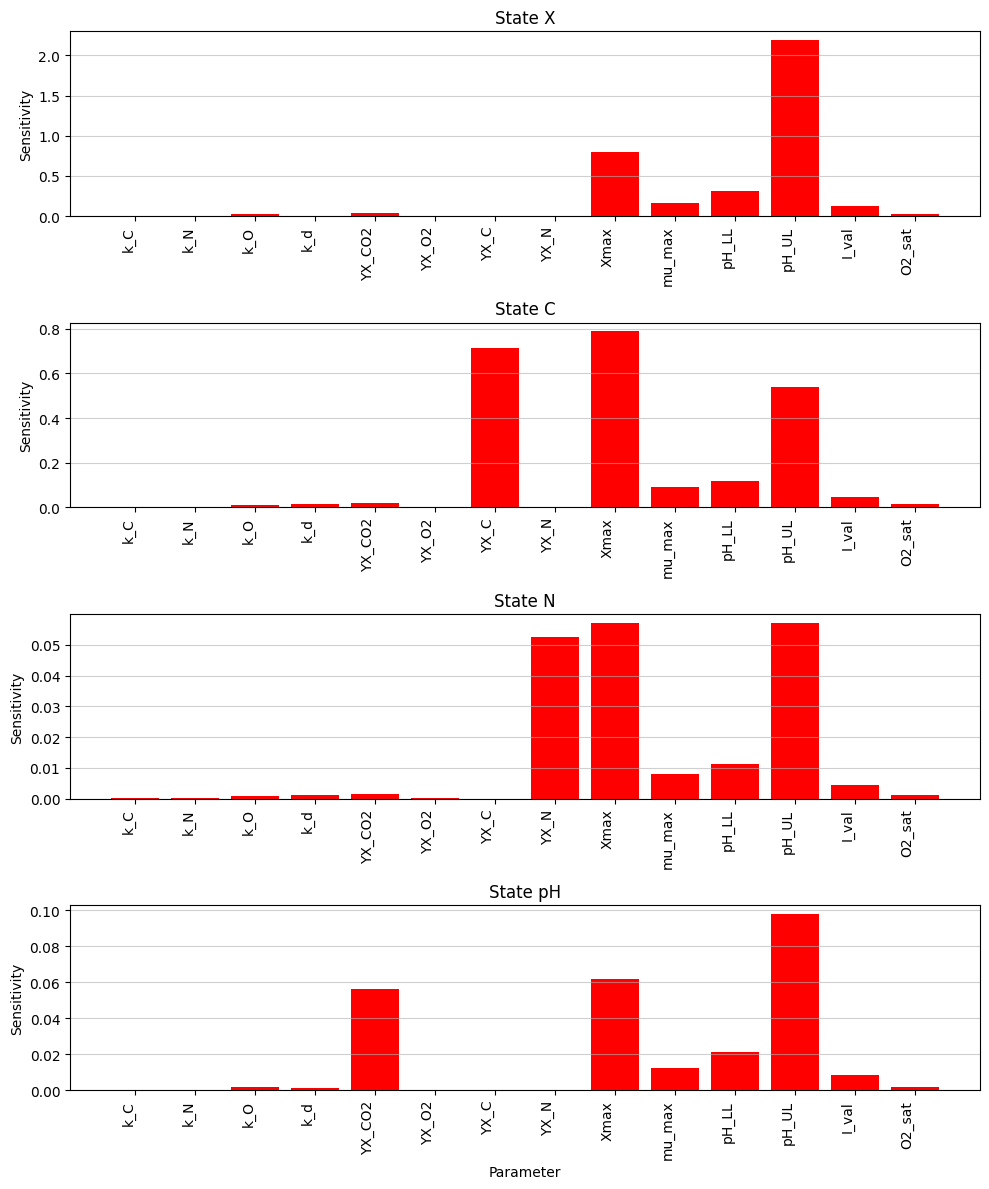

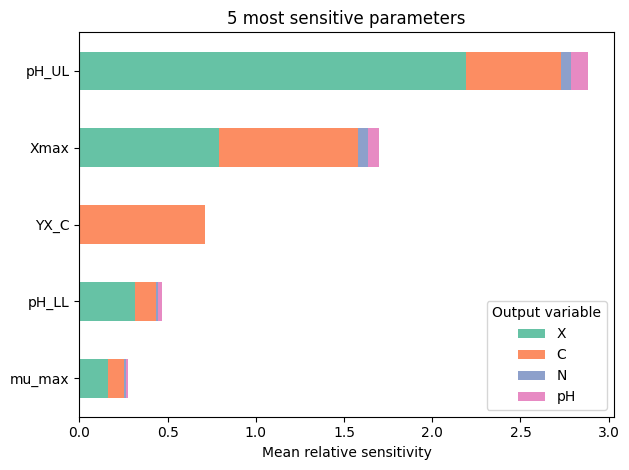

 
 
                                -------------- FIM Analysis --------------


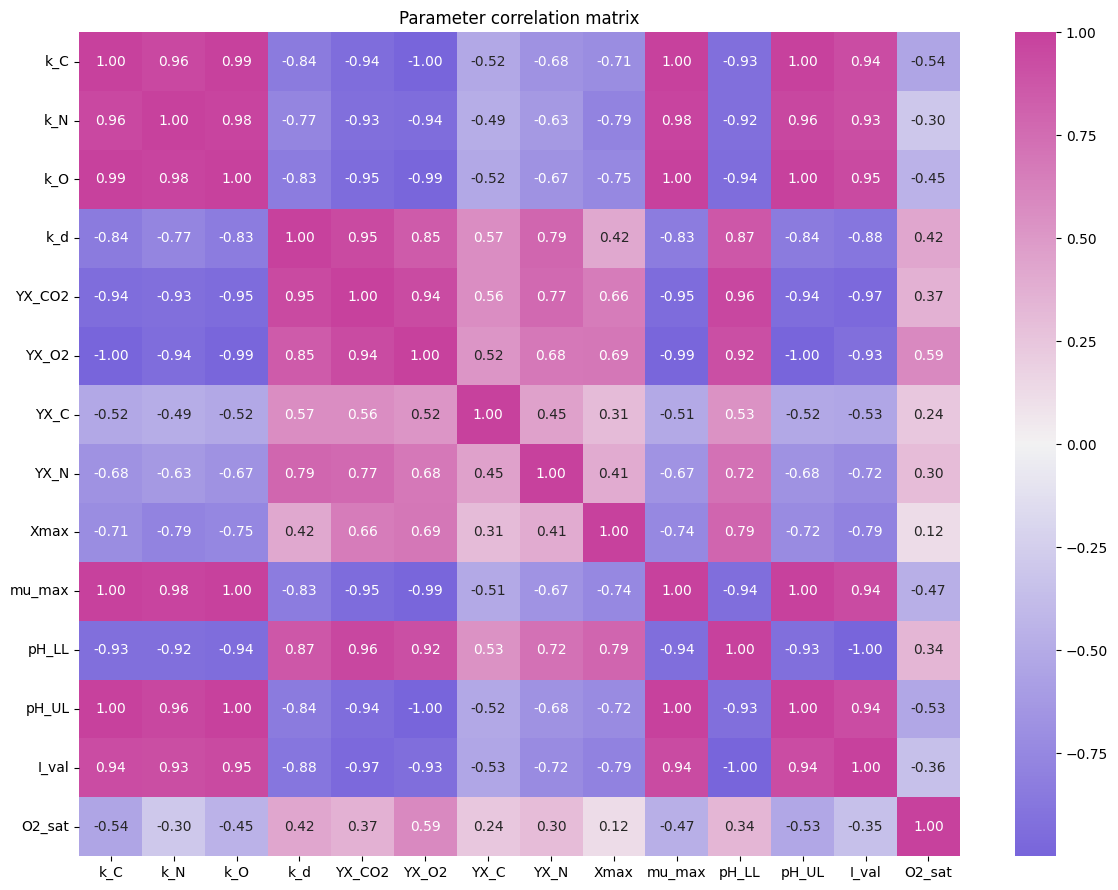

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> k_N                  | correlation: 0.9594
k_C                  <--> k_O                  | correlation: 0.9944
k_C                  <--> YX_O2                | correlation: -0.9977
k_C                  <--> mu_max               | correlation: 0.9963
k_C                  <--> pH_UL                | correlation: 0.9998
k_N                  <--> k_O                  | correlation: 0.9830
k_N                  <--> mu_max               | correlation: 0.9800
k_N                  <--> pH_UL                | correlation: 0.9644
k_O                  <--> YX_CO2               | correlation: -0.9526
k_O                  <--> YX_O2                | correlation: -0.9857
k_O                  <--> mu_max               | correlation: 0.9997
k_O                  <--> pH_UL                | correlation: 0.9961
YX_CO2               <--> pH_LL                | correlation: 0.9622
YX_CO2               <--> I_val                | co

INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.68492979352592, Global best: 10.68492979352592, Runtime: 0.57448 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.68492979352592, Global best: 10.68492979352592, Runtime: 0.60402 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.505303651654112, Global best: 10.505303651654112, Runtime: 0.58442 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.406069792854222, Global best: 10.406069792854222, Runtime: 0.55682 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.322171869419275, Global best: 10.322171869419275, Runtime: 0.54862 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.322171869419275, Global best: 10.322171869419275, Runtime: 0.62334 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 

Mejores parámetros encontrados: [6.4992625  0.40000416]
Error mínimo: 10.311638913299303
Tiempo de optimización: 10.75 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499262
1    mu_max      0.15  0.400004
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8251603576989623
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson st

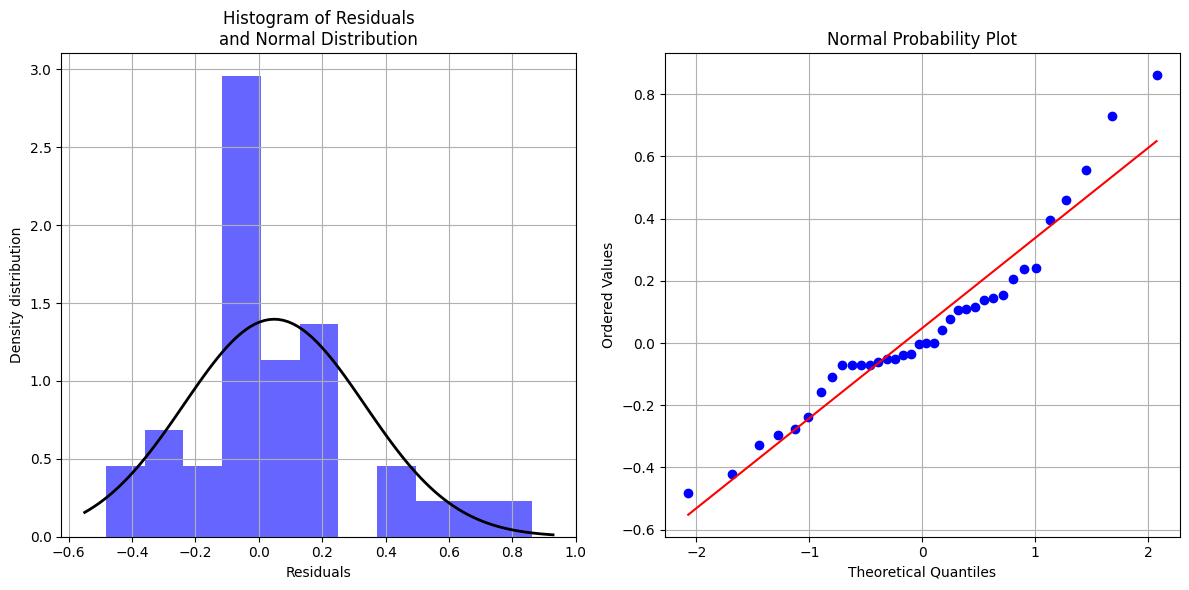

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


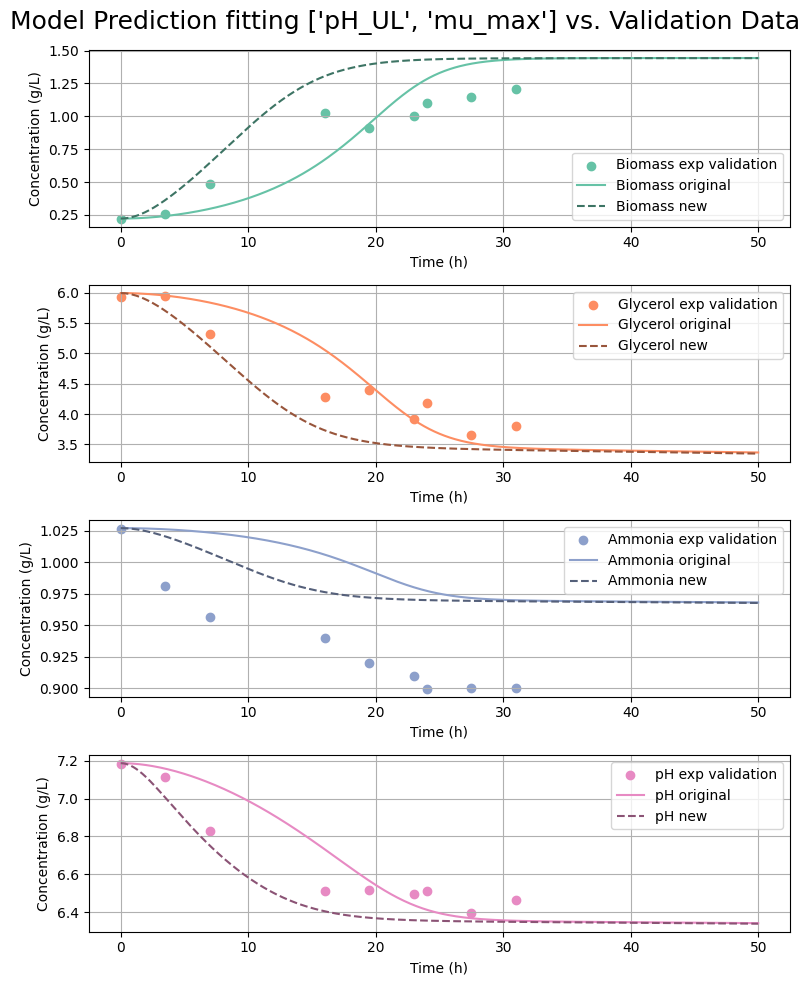

                                -------------- Sensitivity Analysis --------------


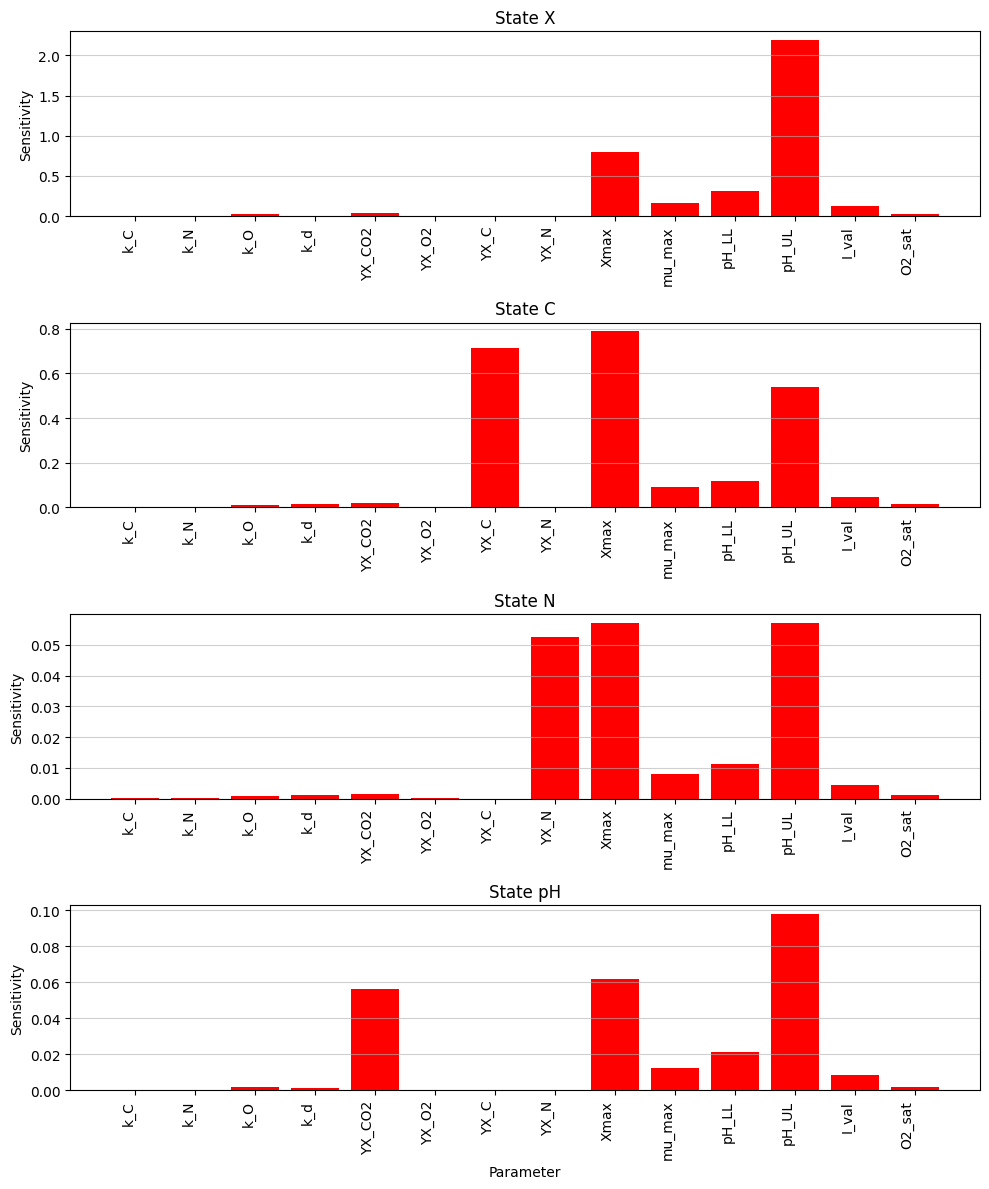

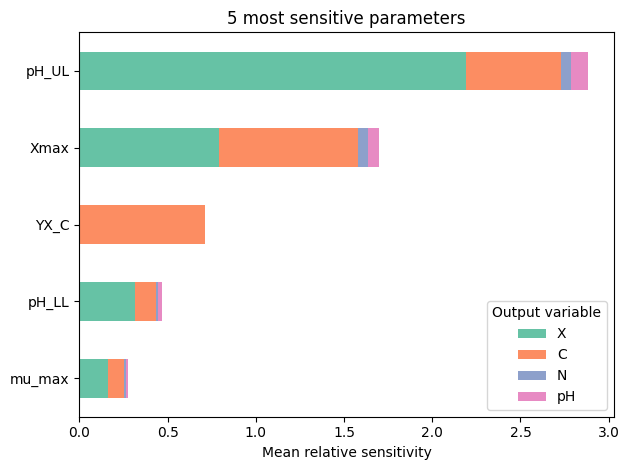

 
 
                                -------------- FIM Analysis --------------


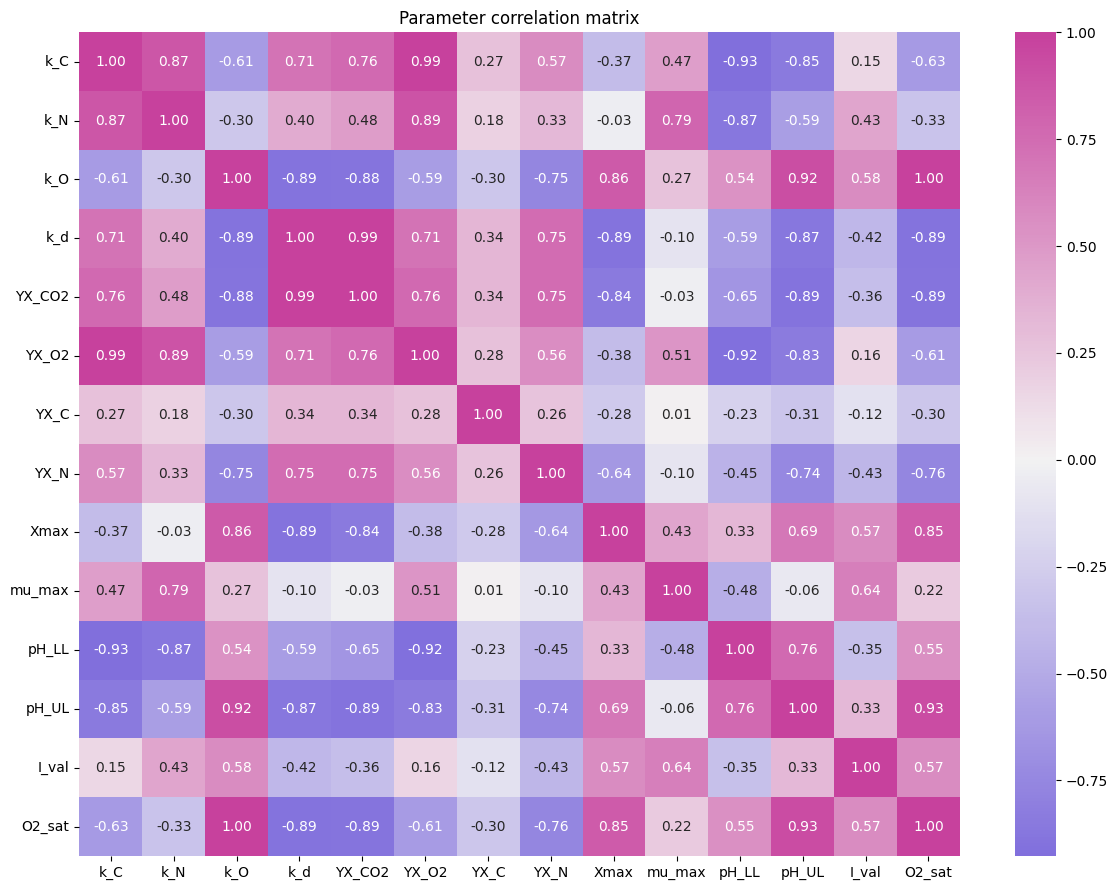

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> YX_O2                | correlation: 0.9884
k_O                  <--> O2_sat               | correlation: 0.9979
k_d                  <--> YX_CO2               | correlation: 0.9869
 
 
                                -------------- t-values --------------
 
 
pH_UL     : θ = 6.499262, SE = 0.000306, t-value = 21216.87
mu_max    : θ = 0.400004, SE = 0.000326, t-value = 1228.88
Appended row, df rows went 6 → 7
Saved to results_iter_over_same_values_1.xlsx



                                    ......Running iteration 8 of 10......
 
 
                                --------------------------------
                                ------- PSO optimization -------
                                --------------------------------
 


INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.702108599902477, Global best: 10.702108599902477, Runtime: 0.58680 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.45391430900189, Global best: 10.45391430900189, Runtime: 0.60329 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.366186486507335, Global best: 10.366186486507335, Runtime: 0.58447 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.366186486507335, Global best: 10.366186486507335, Runtime: 0.58892 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.366186486507335, Global best: 10.366186486507335, Runtime: 0.61621 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.342656939305215, Global best: 10.342656939305215, Runtime: 0.55130 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch

Mejores parámetros encontrados: [6.49995249 0.40027364]
Error mínimo: 10.310354408531307
Tiempo de optimización: 11.77 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499952
1    mu_max      0.15  0.400274
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8273579837534868
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson st

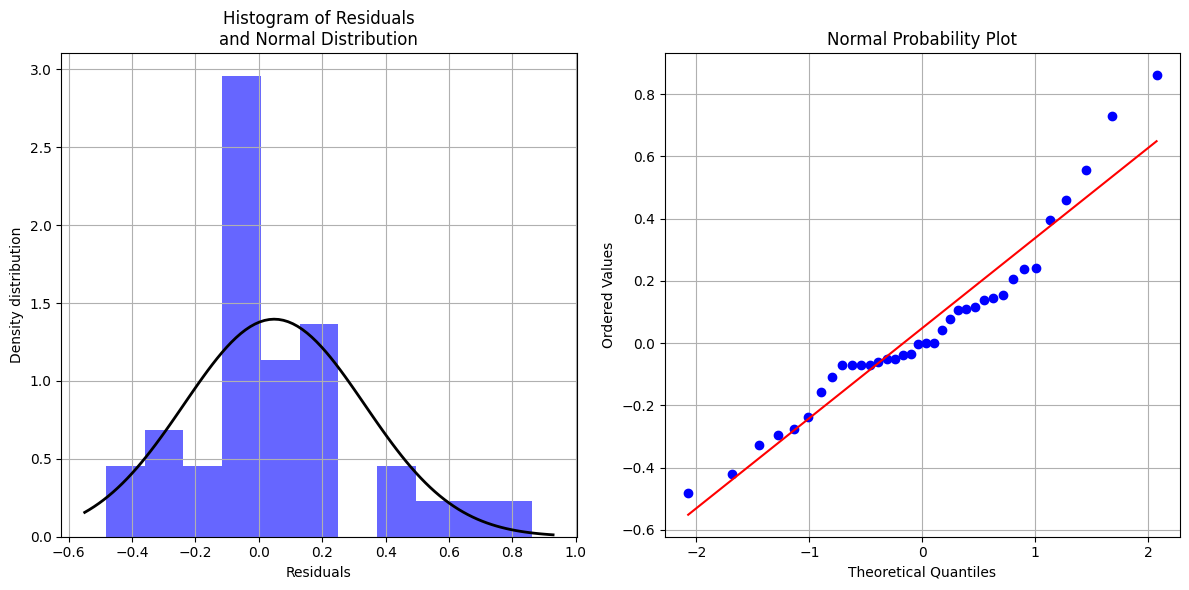

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


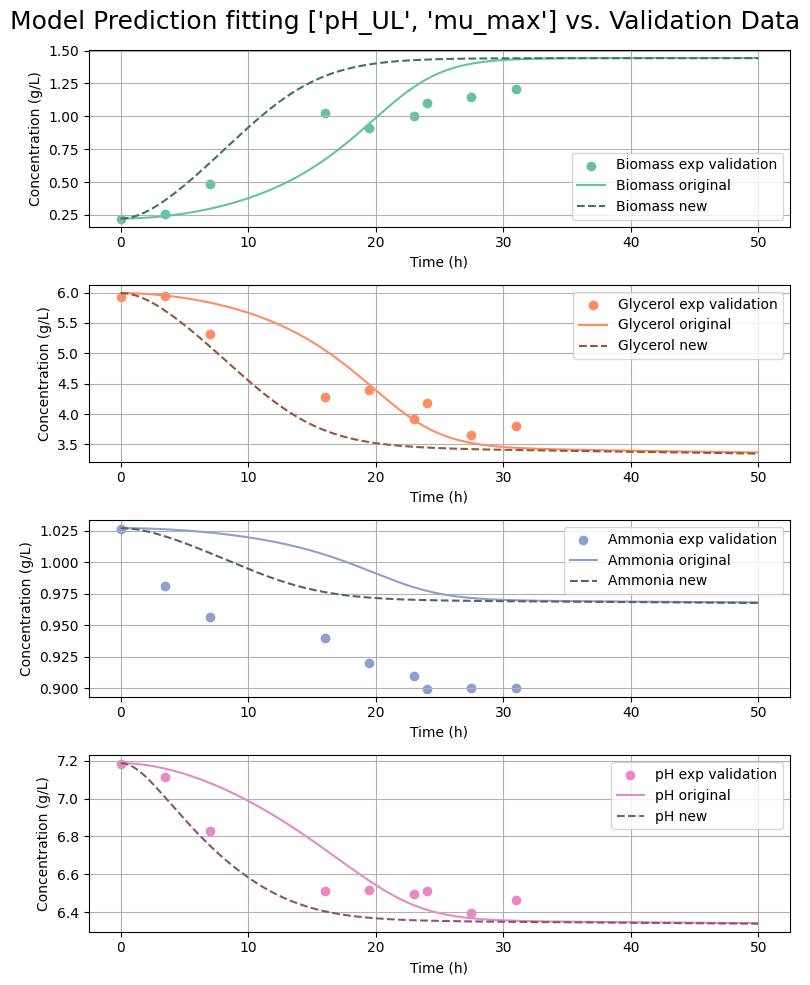

                                -------------- Sensitivity Analysis --------------


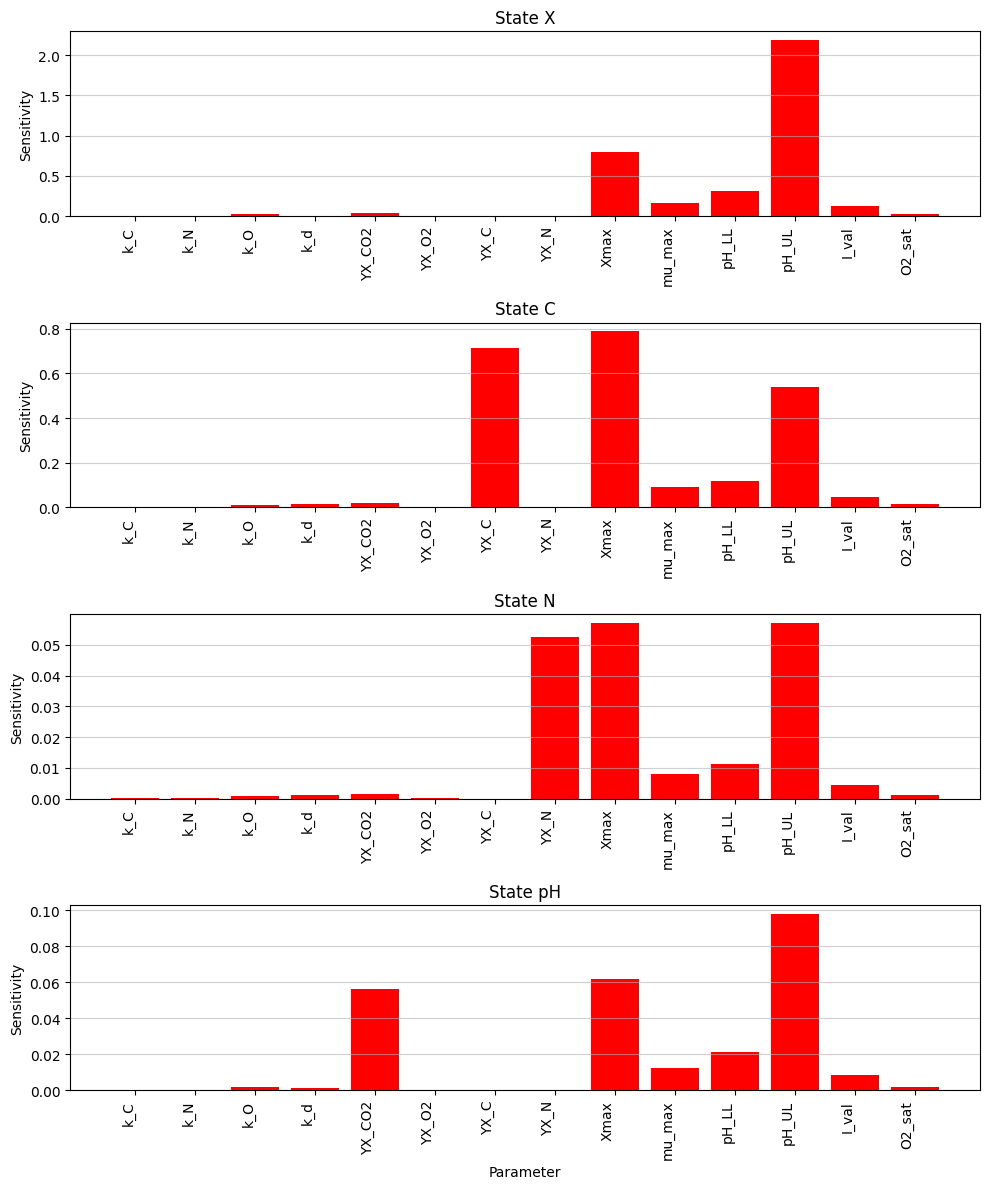

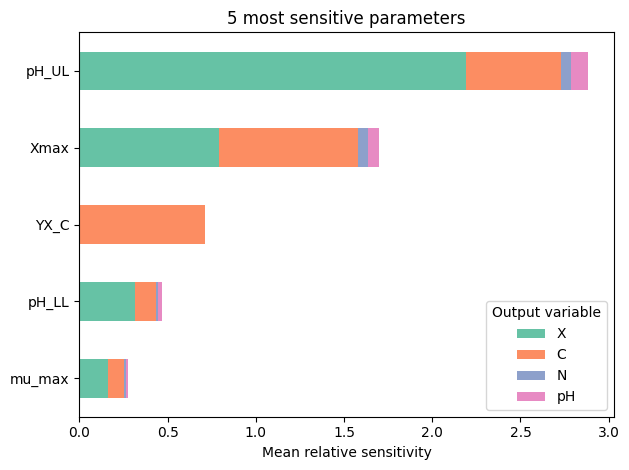

 
 
                                -------------- FIM Analysis --------------


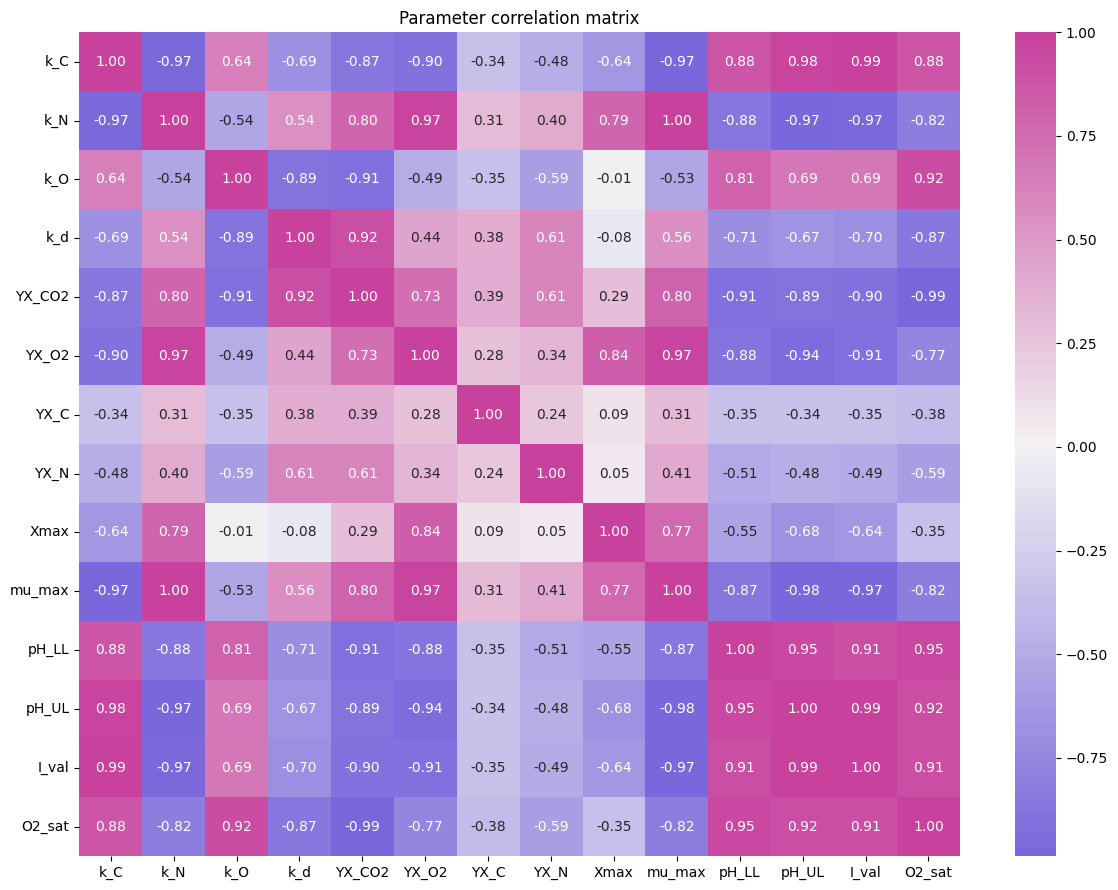

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> k_N                  | correlation: -0.9663
k_C                  <--> mu_max               | correlation: -0.9738
k_C                  <--> pH_UL                | correlation: 0.9761
k_C                  <--> I_val                | correlation: 0.9907
k_N                  <--> YX_O2                | correlation: 0.9742
k_N                  <--> mu_max               | correlation: 0.9980
k_N                  <--> pH_UL                | correlation: -0.9740
k_N                  <--> I_val                | correlation: -0.9712
YX_CO2               <--> O2_sat               | correlation: -0.9868
YX_O2                <--> mu_max               | correlation: 0.9662
mu_max               <--> pH_UL                | correlation: -0.9752
mu_max               <--> I_val                | correlation: -0.9740
pH_LL                <--> pH_UL                | correlation: 0.9524
pH_UL                <--> I_val                

INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.331970430405141, Global best: 10.331970430405141, Runtime: 0.54833 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.331970430405141, Global best: 10.331970430405141, Runtime: 0.59102 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.331970430405141, Global best: 10.331970430405141, Runtime: 0.92904 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.331970430405141, Global best: 10.331970430405141, Runtime: 0.92088 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.331970430405141, Global best: 10.331970430405141, Runtime: 0.95364 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.331970430405141, Global best: 10.331970430405141, Runtime: 0.60946 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epo

Mejores parámetros encontrados: [6.49999316 0.4011369 ]
Error mínimo: 10.327589357243797
Tiempo de optimización: 10.43 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499993
1    mu_max      0.15  0.401137
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8263886733355079
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson st

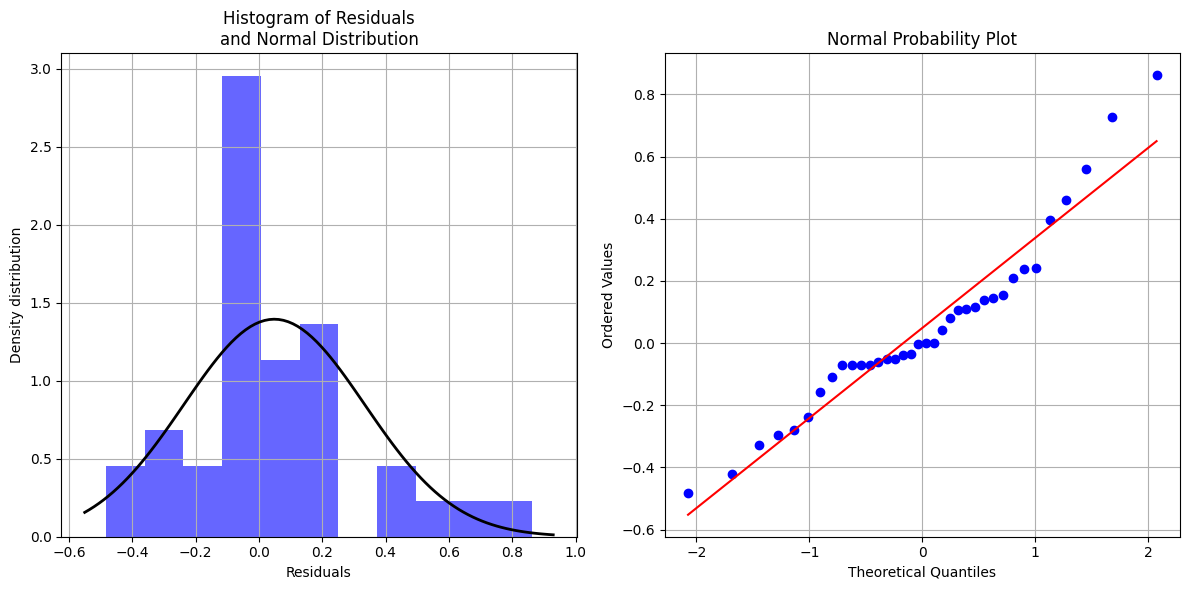

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


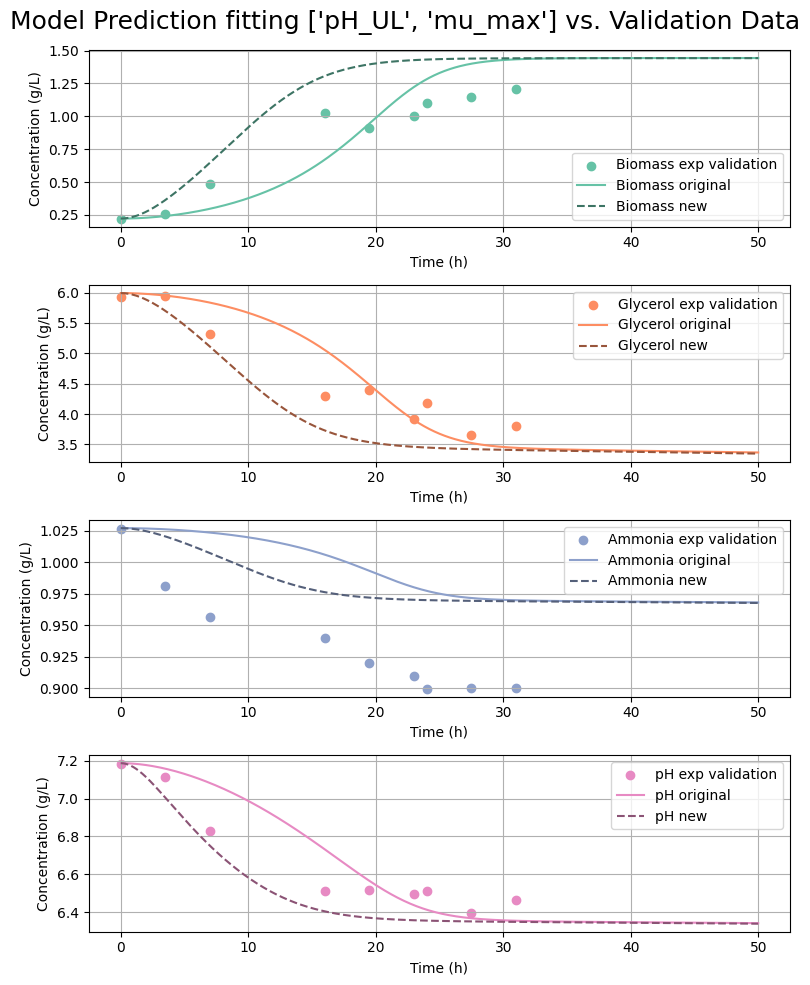

                                -------------- Sensitivity Analysis --------------


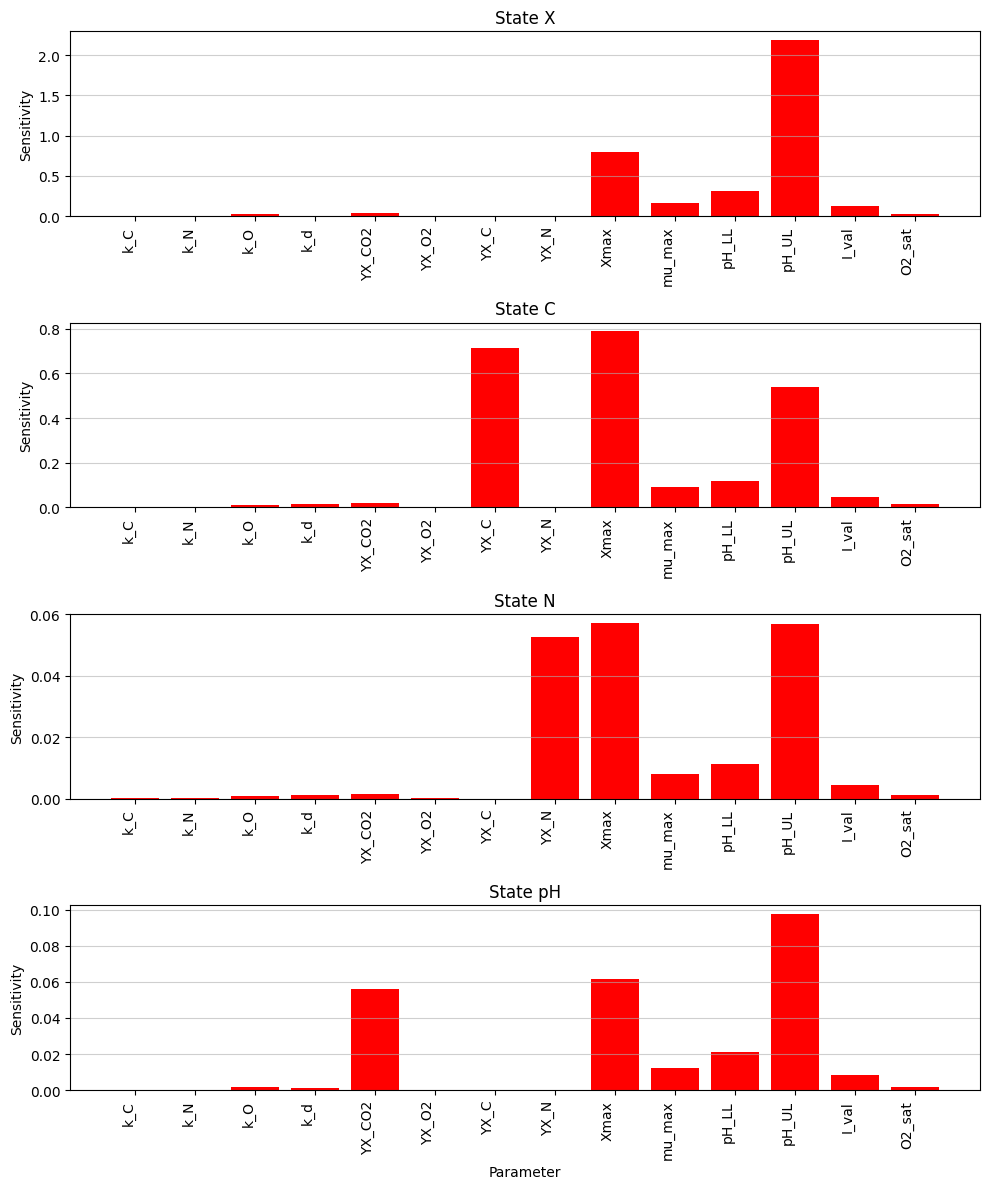

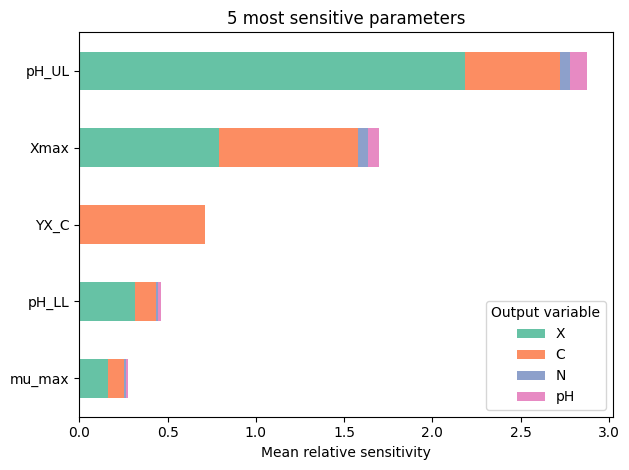

 
 
                                -------------- FIM Analysis --------------


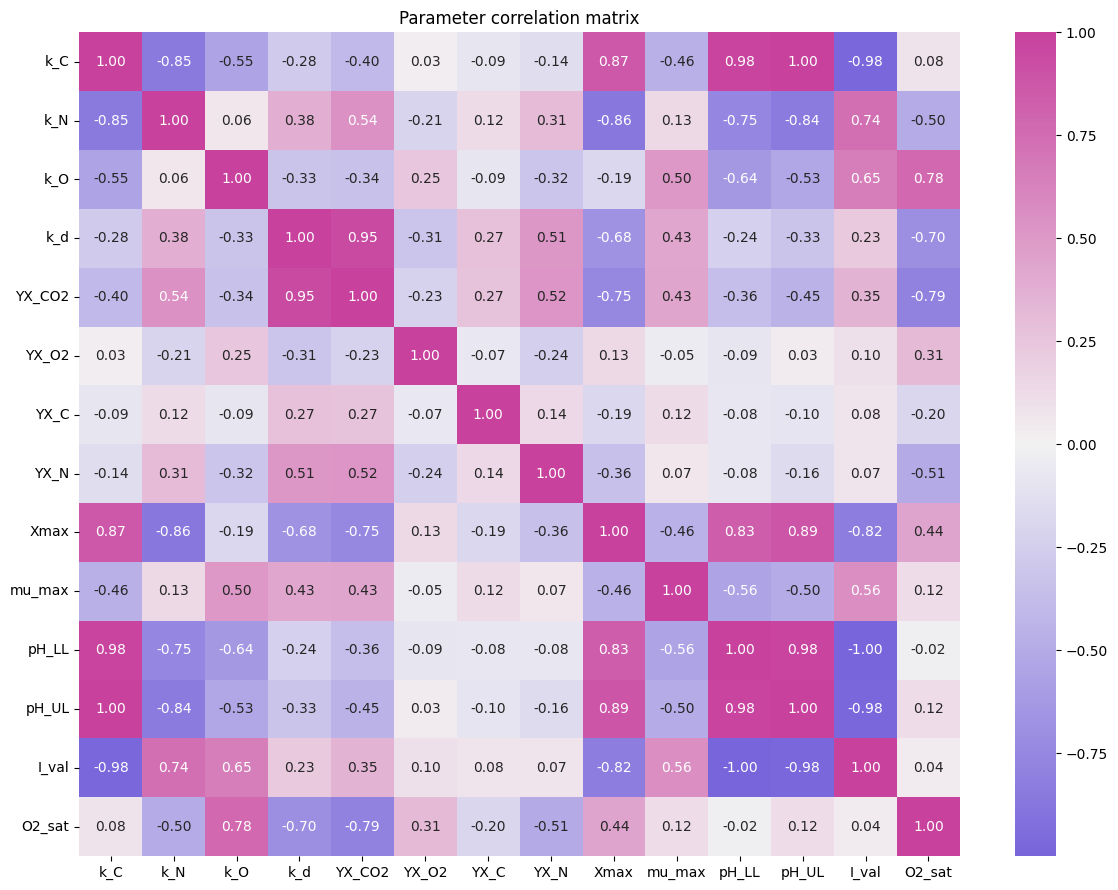

INFO:mealpy.swarm_based.PSO.OriginalPSO:OriginalPSO(epoch=15, pop_size=50, c1=1.5, c2=1.5, w=0.5)


Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> pH_LL                | correlation: 0.9823
k_C                  <--> pH_UL                | correlation: 0.9972
k_C                  <--> I_val                | correlation: -0.9797
k_d                  <--> YX_CO2               | correlation: 0.9512
pH_LL                <--> pH_UL                | correlation: 0.9840
pH_LL                <--> I_val                | correlation: -0.9999
pH_UL                <--> I_val                | correlation: -0.9810
 
 
                                -------------- t-values --------------
 
 
pH_UL     : θ = 6.499993, SE = 0.000296, t-value = 21923.52
mu_max    : θ = 0.401137, SE = 0.000315, t-value = 1273.35
Appended row, df rows went 8 → 9
Saved to results_iter_over_same_values_1.xlsx



                                    ......Running iteration 10 of 10......
 
 
                                --------------------------------
                                ------- P

INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 10.664936573050396, Global best: 10.664936573050396, Runtime: 0.91480 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 10.45956704595096, Global best: 10.45956704595096, Runtime: 0.91036 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 10.42205157232634, Global best: 10.42205157232634, Runtime: 0.57409 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 10.42205157232634, Global best: 10.42205157232634, Runtime: 0.56055 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 10.376184836449921, Global best: 10.376184836449921, Runtime: 0.57569 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 10.36915002895459, Global best: 10.36915002895459, Runtime: 0.57476 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 7, C

Mejores parámetros encontrados: [6.4997712  0.40005409]
Error mínimo: 10.307519712007453
Tiempo de optimización: 10.23 s
 
                                ------------------------------
                                ------- New Parameters -------
                                ------------------------------
 
  Parámetro  original       new
0     pH_UL      7.40  6.499771
1    mu_max      0.15  0.400054
                                ----------------------------------------------
                                ------- Validation - Residual Analysis -------
                                ----------------------------------------------
 

Anderson-Darling test statistic: 0.8269764520673419
Critical values and significance levels:
  Significance level 15.0%: Critical value 0.528
  Significance level 10.0%: Critical value 0.601
  Significance level 5.0%: Critical value 0.721
  Significance level 2.5%: Critical value 0.841
  Significance level 1.0%: Critical value 1.0

Durbin-Watson st

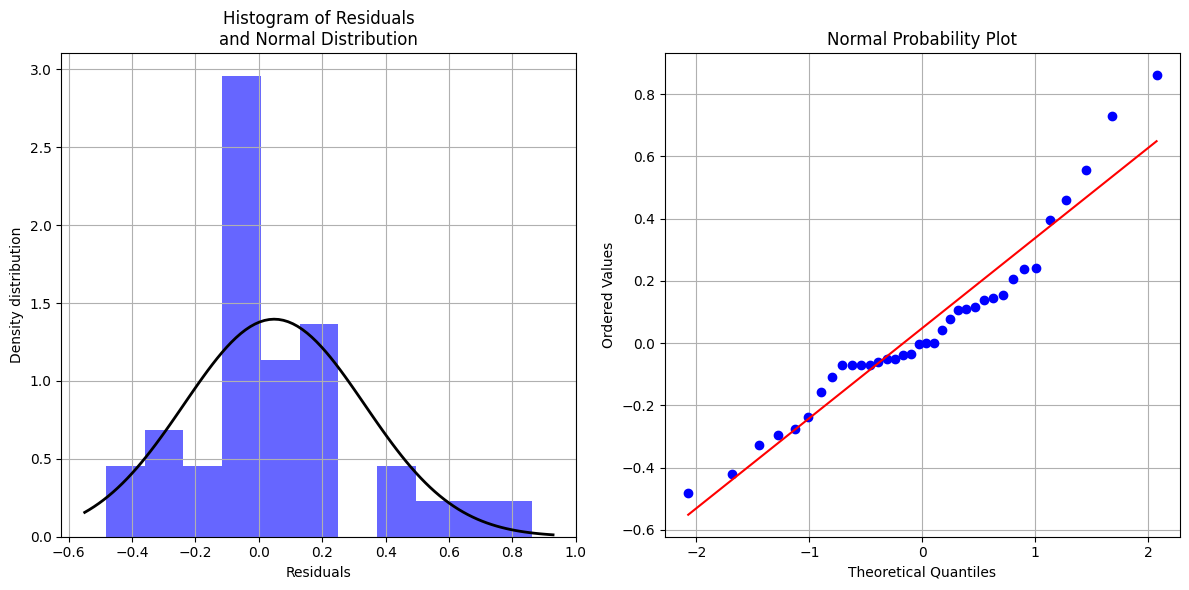

 
 
                                ----------------------------------
                                ------- Parameter Analysis -------
                                ----------------------------------
 
VISUAL COMPARISON WITN VALIDATION DATA USING ORIGINAL PARAMETERS AMF UPDATED PARAMETERS, SIMULATED IN VALIDATION TIMEFRAME AND VALIDATION INITIAL CONDITIONS


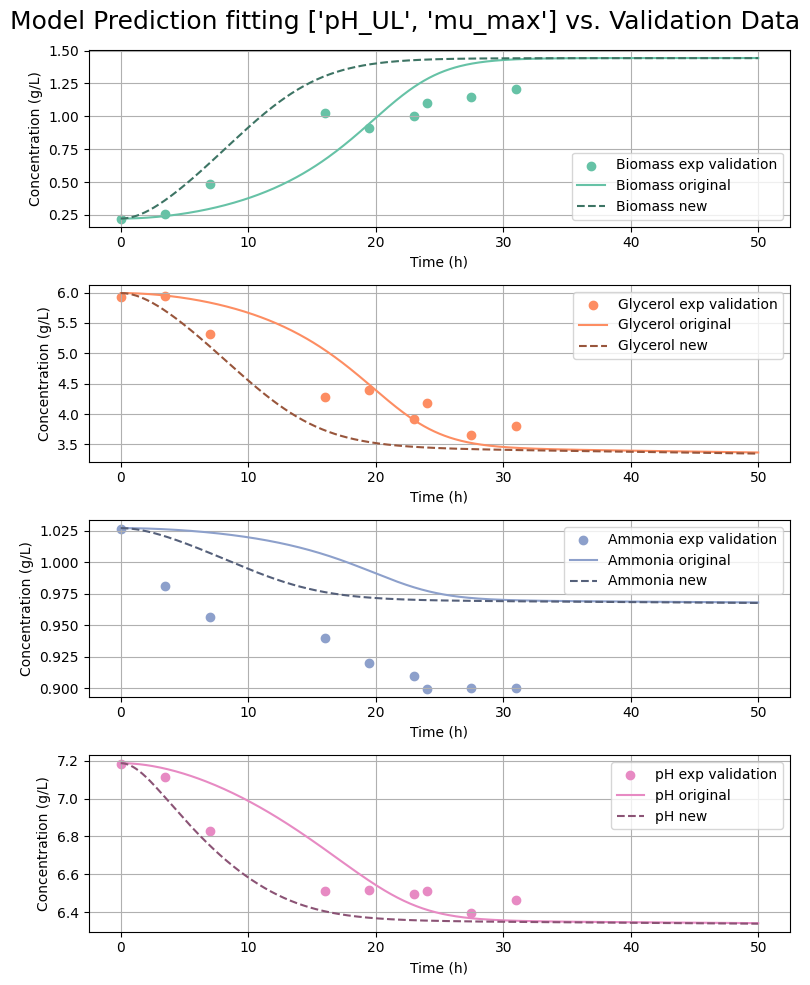

                                -------------- Sensitivity Analysis --------------


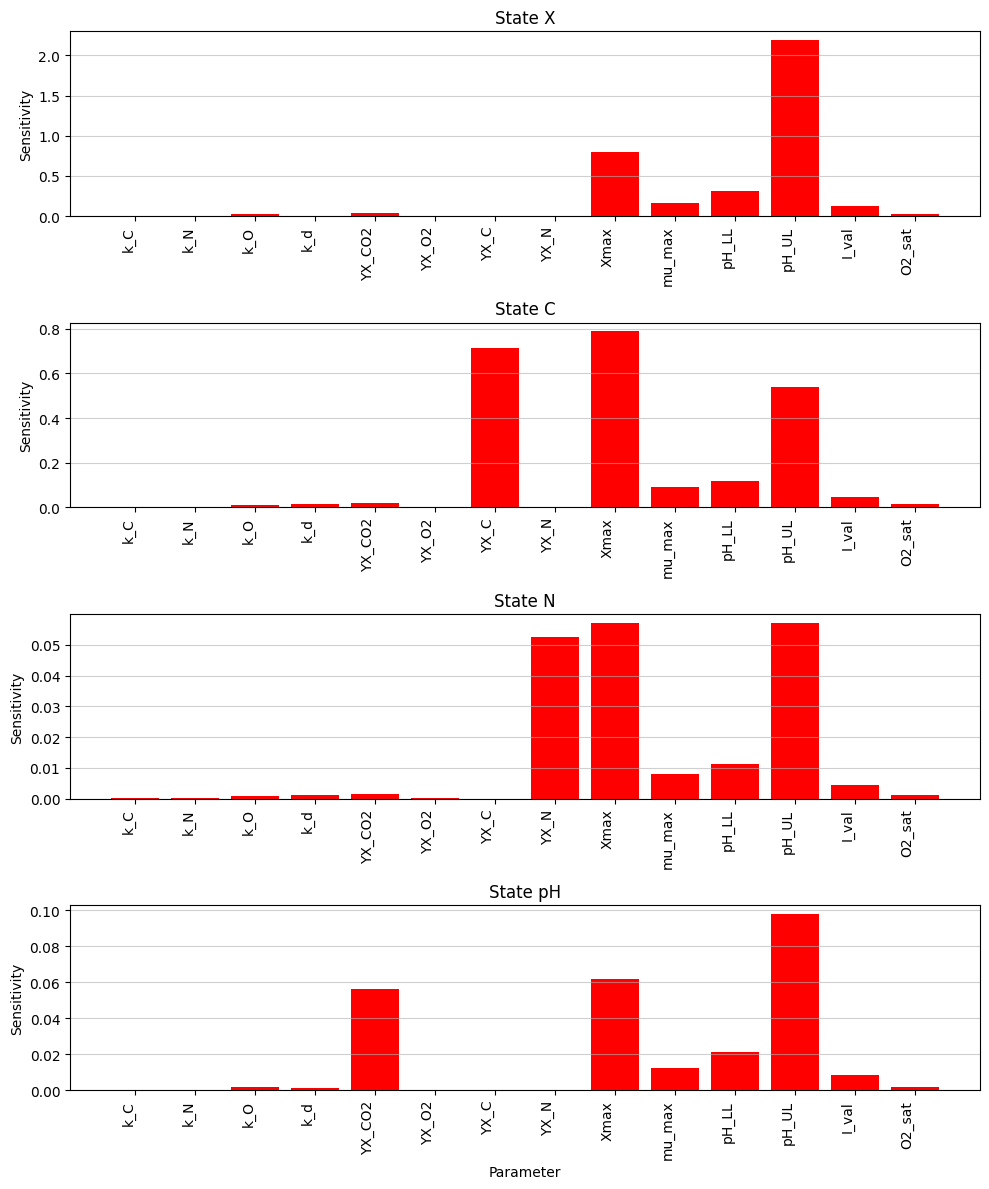

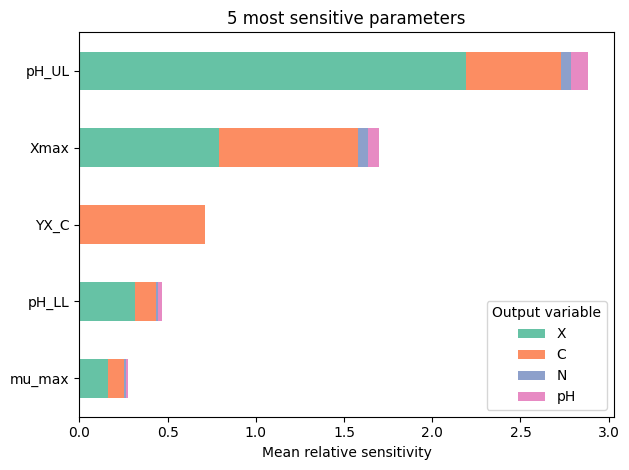

 
 
                                -------------- FIM Analysis --------------


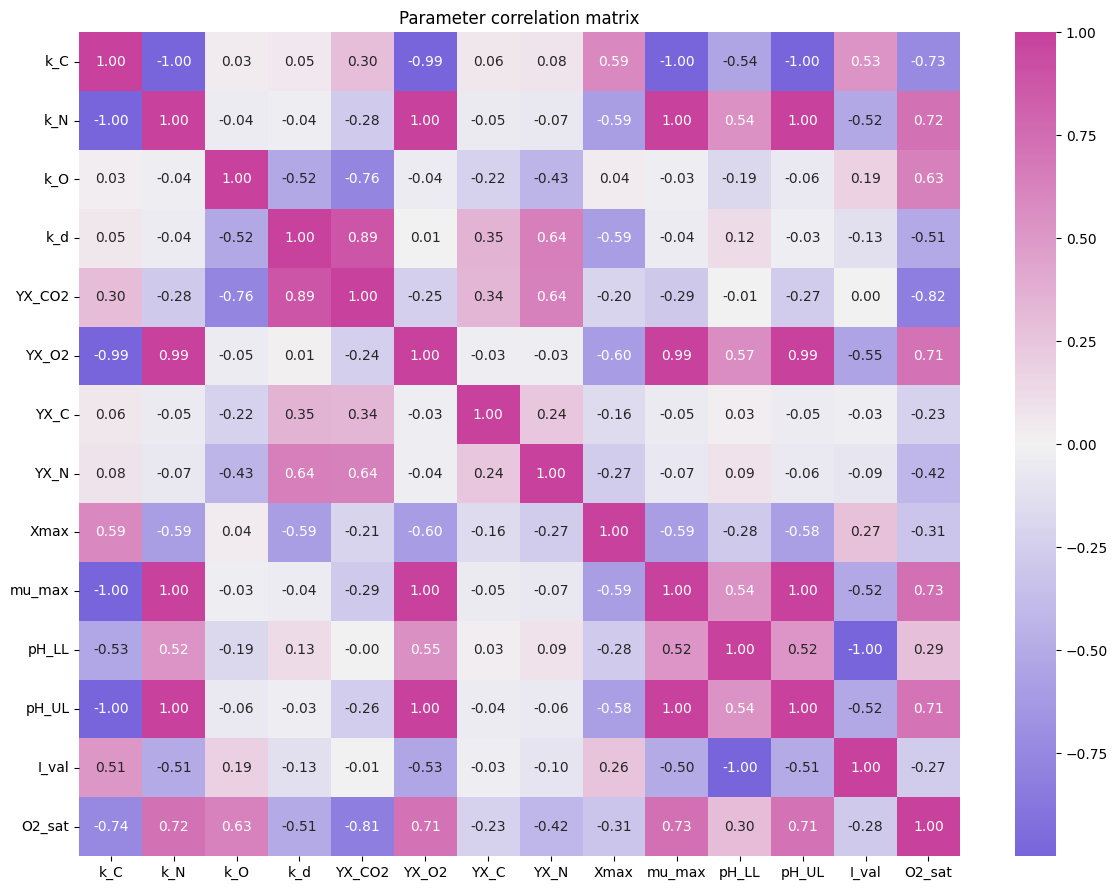

Highly correlated parameter pairs (|ρ| > 0.95):

k_C                  <--> k_N                  | correlation: -0.9992
k_C                  <--> YX_O2                | correlation: -0.9936
k_C                  <--> mu_max               | correlation: -0.9991
k_C                  <--> pH_UL                | correlation: -0.9979
k_N                  <--> YX_O2                | correlation: 0.9953
k_N                  <--> mu_max               | correlation: 0.9999
k_N                  <--> pH_UL                | correlation: 0.9996
YX_O2                <--> mu_max               | correlation: 0.9946
YX_O2                <--> pH_UL                | correlation: 0.9947
mu_max               <--> pH_UL                | correlation: 0.9994
pH_LL                <--> I_val                | correlation: -1.0000
 
 
                                -------------- t-values --------------
 
 
pH_UL     : θ = 6.499771, SE = 0.000302, t-value = 21536.96
mu_max    : θ = 0.400054, SE = 0.000320, t-value

In [8]:
# Loop to run the main function multiple times with the same parameters

for i in range(n):
    print("")
    print("")
    print("")
    print(f"                                    ......Running iteration {i+1} of {n}......")
    Results = RUN_MAIN(iteration = i, condition = condition,
                        perturbation = perturbation,
                        correlation_threshold = correlation_threshold,
                        params_list = params_list,
                        lb = lb,
                        ub = ub)

    if i == 0:
        run_name = "Original Model"
    else:
        run_name = f"Run_{i+1}"
    Results.insert(0, 'Run', run_name)

    before = df.shape[0]
    df = pd.concat([df, Results], ignore_index=True)
    after = df.shape[0]
    print(f"Appended row, df rows went {before} → {after}")

    df.to_excel(excel_file, index=False)
    print(f"Saved to {excel_file}")

print(" ALL ITERATIONS DONE — final df shape:", df.shape)

In [9]:
df

Run  mu_max_value  pH_UL_value  RMSE_X_new  NMRSE_X_new  \
0  Original Model      0.150000     7.400000    0.200585     0.204472   
1           Run_2      0.400213     6.500000    0.293299     0.298982   
2           Run_3      0.400036     6.499604    0.293292     0.298976   
3           Run_4      0.400091     6.499871    0.293275     0.298958   
4           Run_5      0.400006     6.499984    0.293230     0.298912   
5           Run_6      0.400001     6.499889    0.293242     0.298924   
6           Run_7      0.400004     6.499262    0.293329     0.299013   
7           Run_8      0.400274     6.499952    0.293326     0.299010   
8           Run_9      0.401137     6.499993    0.293612     0.299302   
9          Run_10      0.400054     6.499771    0.293276     0.298959   

   MAPE_X_new  RMSE_C_new  NMRSE_C_new  MAPE_C_new  RMSE_N_new  ...  \
0   17.904945    0.361522     0.158669    6.023659    0.064237  ...   
1   30.272941    0.484635     0.212702    9.755016    0.054004  ...   
2   30.282120    0.484621     0.212696    9.755562    0.054003  ...   
3   30.272223    0.484582     0.212679    9.754110    0.054004  ...   
4   30.261773    0.484482     0.212635    9.751646    0.054007  ...   
5   30.266178    0.484508     0.212646    9.752427    0.054006  ...   
6   30.297100    0.484703     0.212732    9.758122    0.054000  ...   
7   30.278715    0.484695     0.212729    9.756459    0.054002  ...   
8   30.326212    0.485338     0.213011    9.770633    0.053989  ...   
9   30.274998    0.484584     0.212680    9.754384    0.054004  ...   

   t_value_YX_CO2  t_value_YX_O2  t_value_YX_C  t_value_YX_N  t_value_Xmax  \
0      560.652727       0.008414    206.609846     464.86271   1006.636947   
1             NaN            NaN           NaN           NaN           NaN   
2             NaN            NaN           NaN           NaN           NaN   
3             NaN            NaN           NaN           NaN           NaN   
4             NaN            NaN           NaN           NaN           NaN   
5             NaN            NaN           NaN           NaN           NaN   
6             NaN            NaN           NaN           NaN           NaN   
7             NaN            NaN           NaN           NaN           NaN   
8             NaN            NaN           NaN           NaN           NaN   
9             NaN            NaN           NaN           NaN           NaN   

   t_value_mu_max  t_value_pH_LL  t_value_pH_UL  t_value_I_val  t_value_O2_sat  
0        0.004721       0.003536       5.990073       0.002143        1.466258  
1     1302.173230            NaN   22440.087249            NaN             NaN  
2     1261.205015            NaN   21757.619412            NaN             NaN  
3     1248.926270            NaN   21531.795141            NaN             NaN  
4     1251.222536            NaN   21568.145631            NaN             NaN  
5     1248.579433            NaN   21527.230368            NaN             NaN  
6     1228.884552            NaN   21216.867917            NaN             NaN  
7     1243.203701            NaN   21424.727937            NaN             NaN  
8     1273.349257            NaN   21923.515617            NaN             NaN  
9     1248.896229            NaN   21536.959449            NaN             NaN  

[10 rows x 34 columns]